In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
big_dataset= pd.read_csv('/content/drive/MyDrive/Computer Engineering /Three_main_dataset/merged_df.csv')

In [ ]:
dataset_onlycve=pd.read_csv('/content/drive/MyDrive/Computer Engineering /Three_main_dataset/merged_df_new_noEmptyCVE.csv')

In [ ]:
dataset_withemptycve=pd.read_csv('/content/drive/MyDrive/Computer Engineering /Three_main_dataset/merged_df_withCVEcount.csv')

In [ ]:
big_dataset

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp
0,HTTPClient:HTTPClient:0.3-3,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",HTTPClient,HTTPClient:HTTPClient,1122887875000
1,abbot:abbot:0.12.3,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,320049365000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1122887876000
2,abbot:abbot:0.13.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,320049364000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1122887877000
3,abbot:abbot:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",abbot,abbot:abbot,1442937241000
4,abbot:costello:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",costello,abbot:costello,1443086506000
...,...,...,...,...,...,...,...,...,...
14459134,zone.wmj:user-agent-util:1.2.9,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,8373804000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1646991701000
14459135,zone.wmj:user-agent-util:2.0.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1655365505000
14459136,zw.co.paynow:java-sdk:1.0.0,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,11996676000,"{\\""cve\\"":[]}",java-sdk,zw.co.paynow:java-sdk,1548509171000
14459137,zw.co.paynow:java-sdk:1.1.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,6831477000,"{\\""cve\\"":[]}",java-sdk,zw.co.paynow:java-sdk,1553674370000


<ipython-input-6-888030a03b1f>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


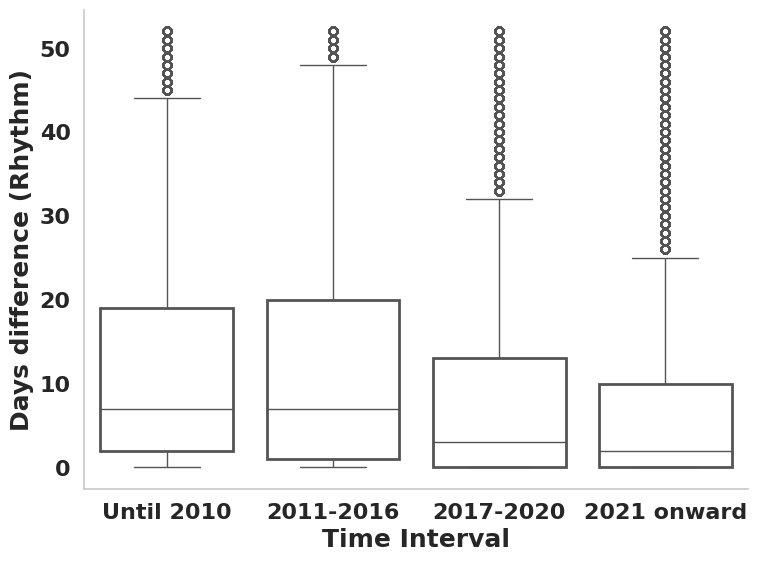

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Timestamp' column is in numeric format
big_dataset['Timestamp'] = pd.to_numeric(big_dataset['Timestamp'], errors='coerce')

# Convert 'Timestamp' from Unix milliseconds to datetime format
big_dataset['Timestamp1'] = pd.to_datetime(big_dataset['Timestamp'], unit='ms')

# Extract Year from 'Timestamp' for grouping
big_dataset['Year'] = big_dataset['Timestamp1'].dt.year

# Sort the dataset by 'artifact' and 'Timestamp' in chronological order
big_dataset = big_dataset.sort_values(by=['artifact', 'Timestamp1'], ascending=[True, True])

# Calculate the time gap between consecutive releases in days
big_dataset['Time Gap (Days)'] = big_dataset.groupby('artifact')['Timestamp1'].diff().dt.days

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal to the 'Time Gap (Days)' column
big_dataset = remove_outliers(big_dataset, 'Time Gap (Days)')

# Corrected function to assign time intervals
def assign_time_interval(year):
    if year <= 2010:
        return 'Until 2010'
    elif 2011 <= year <= 2016:
        return '2011-2016'
    elif 2017 <= year <= 2020:
        return '2017-2020'
    else:
        return '2021 onward'

# Create a new column for the time intervals
big_dataset['Time Interval'] = big_dataset['Year'].apply(assign_time_interval)

# Set up the plot style without grid and box
sns.set(style="whitegrid", font_scale=1.6)

# Create the boxplot for 'Time Gap (Days)' by 'Time Interval'
plt.figure(figsize=(8, 6))  # Increased figure size for more space
sns.boxplot(
    x='Time Interval',
    y='Time Gap (Days)',
    data=big_dataset,
    order=['Until 2010', '2011-2016', '2017-2020', '2021 onward'],  # Specify the order
    boxprops=dict(linewidth=2, facecolor='none'),
    palette="muted"
)

# Remove grid and axes box
plt.grid(False)
sns.despine()

# Set axis labels with bold font and adjusted font sizes
plt.ylabel('Days difference (Rhythm)', fontsize=18, fontweight='bold')
plt.xlabel('Time Interval', fontsize=18, fontweight='bold')

# Adjust font size for axis ticks and adjust layout
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.tight_layout()

# Save the plot with high resolution
plt.savefig('boxplot_publication_quality_intervals.png', dpi=800, bbox_inches='tight')

# Show the plot
plt.show()


<ipython-input-7-5b7e349494be>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Time Gap (Days)', data=big_dataset, boxprops=dict(linewidth=2, facecolor='none'), palette="muted")


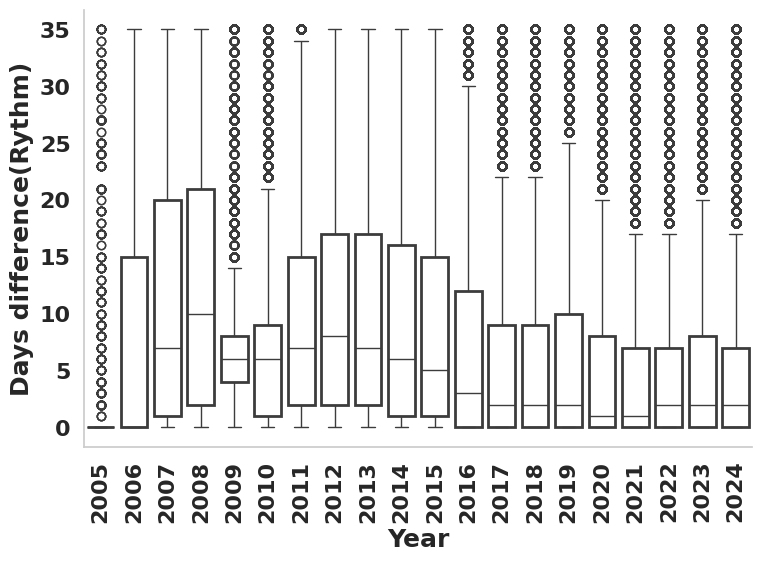

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Timestamp' column is in numeric format
big_dataset['Timestamp'] = pd.to_numeric(big_dataset['Timestamp'], errors='coerce')

# Convert 'Timestamp' from Unix milliseconds to datetime format
big_dataset['Timestamp1'] = pd.to_datetime(big_dataset['Timestamp'], unit='ms')

# Extract Year from 'Timestamp' for grouping
big_dataset['Year'] = big_dataset['Timestamp1'].dt.year

# Sort the dataset by 'artifact' and 'Timestamp' in chronological order
big_dataset = big_dataset.sort_values(by=['artifact', 'Timestamp'], ascending=[True, True])

# Calculate the time gap between consecutive releases in days
big_dataset['Time Gap (Days)'] = big_dataset.groupby('artifact')['Timestamp1'].diff().dt.days

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal to the 'Time Gap (Days)' column
big_dataset = remove_outliers(big_dataset, 'Time Gap (Days)')

# Set up the plot style without grid and box
sns.set(style="whitegrid", font_scale=1.6)

# Create the boxplot for 'Time Gap (Days)' by 'Year'
plt.figure(figsize=(8, 6))  # Increased figure size for more space
sns.boxplot(x='Year', y='Time Gap (Days)', data=big_dataset, boxprops=dict(linewidth=2, facecolor='none'), palette="muted")

# Remove grid and axes box
plt.grid(False)
sns.despine()

# Set axis labels with bold font and adjusted font sizes
plt.ylabel('Days difference(Rythm)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=18, fontweight='bold')

# Rotate x-axis labels, adjust font size for axis ticks, and adjust layout
plt.xticks(rotation=90, fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.tight_layout()

# Save the plot with high resolution
plt.savefig('boxplot_publication_quality_bigger.png', dpi=2400, bbox_inches='tight')

# Show the plot
plt.show()


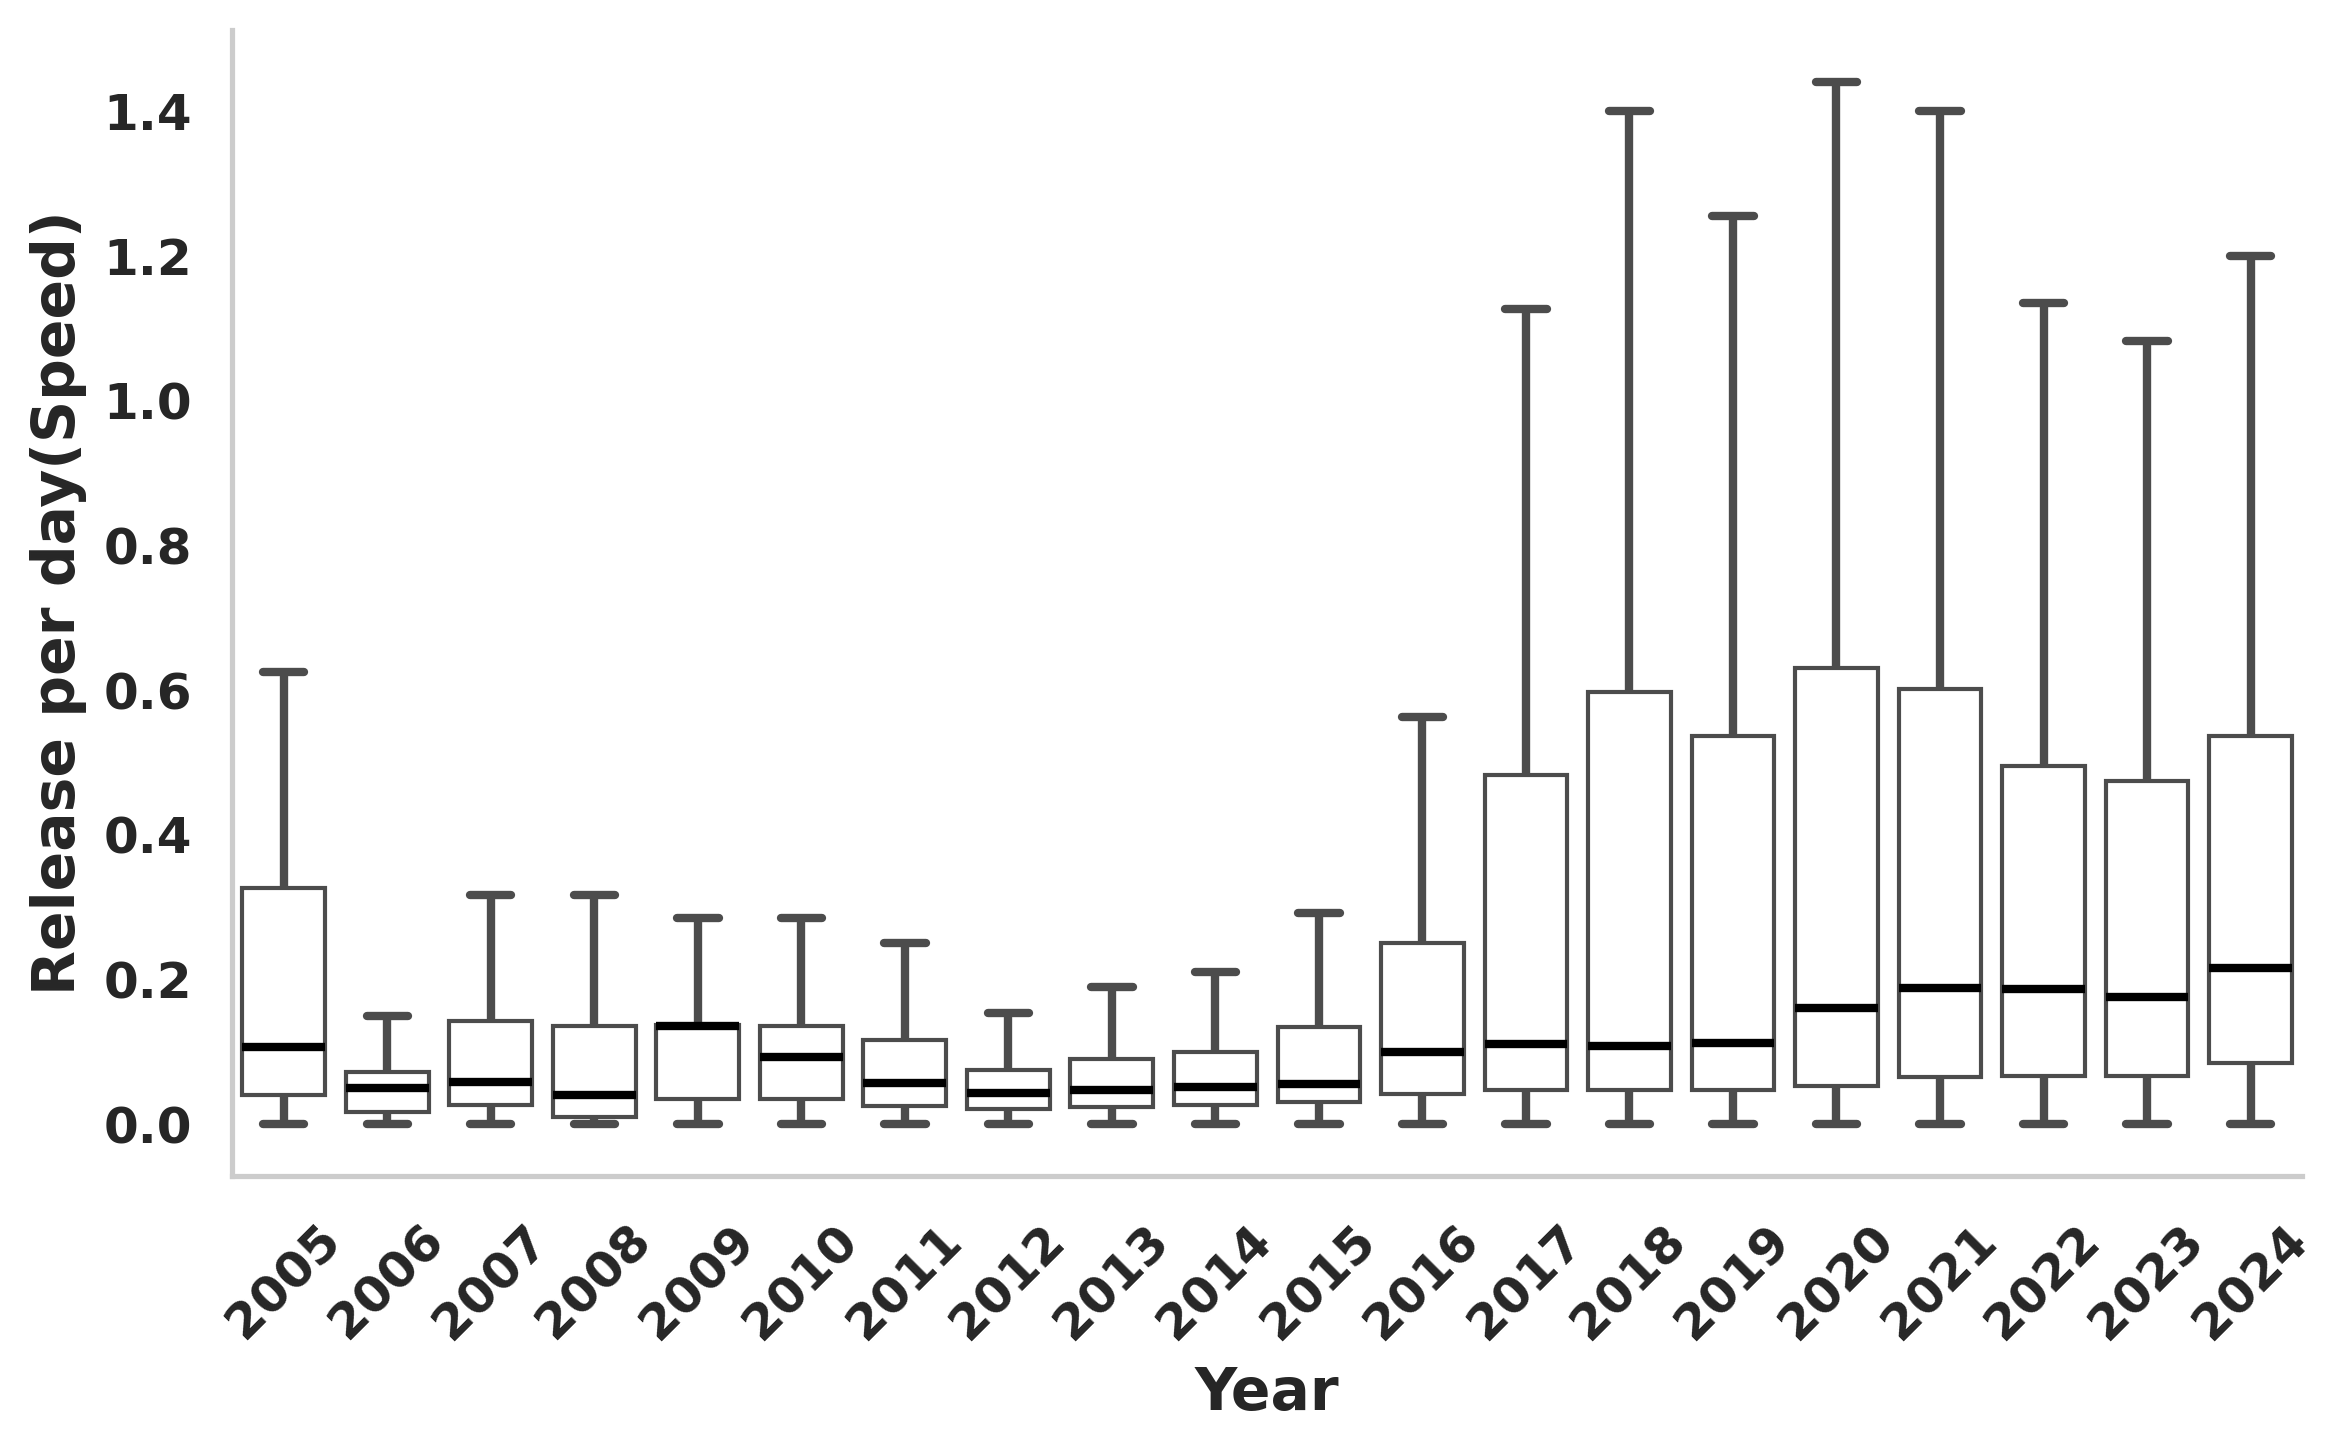

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")


# Ensure the 'Timestamp' column is in numeric format
big_dataset['Timestamp'] = pd.to_numeric(big_dataset['Timestamp'], errors='coerce')

# Convert 'Timestamp' from Unix milliseconds to datetime format
big_dataset['Timestamp1'] = pd.to_datetime(big_dataset['Timestamp'], unit='ms')

# Extract Year from 'Timestamp' for grouping
big_dataset['Year'] = big_dataset['Timestamp1'].dt.year

# Sort the dataset by 'artifact' and 'Timestamp' in chronological order
big_dataset = big_dataset.sort_values(by=['artifact', 'Timestamp1'], ascending=[True, True])

# Calculate the time gap between the first and last timestamps per artifact
artifact_speed = big_dataset.groupby('artifact').agg(
    first_timestamp=('Timestamp1', 'first'),
    last_timestamp=('Timestamp1', 'last'),
    total_releases=('Timestamp1', 'count')
)

# Calculate the gap in days between the first and last timestamp
artifact_speed['Gap (Days)'] = (artifact_speed['last_timestamp'] - artifact_speed['first_timestamp']).dt.days

# Calculate releases per day (speed)
artifact_speed['Releases per Day'] = artifact_speed['total_releases'] / artifact_speed['Gap (Days)']

# Merge the speed data back into the original dataframe
big_dataset = big_dataset.merge(artifact_speed[['Releases per Day']], on='artifact', how='left')

# Create the boxplot for 'Releases per Day' by 'Year'
plt.figure(figsize=(8, 5), dpi=300)  # Small size with high resolution for publication

# Create the boxplot for 'Releases per Day' by 'Year'
boxplot = sns.boxplot(x='Year', y='Releases per Day', data=big_dataset,
                      showcaps=True, boxprops={'facecolor':'None'},
                      whiskerprops={'linewidth':2}, capprops={'linewidth':2},
                      medianprops={'color':'black', 'linewidth':2},
                      showfliers=False)

# Add error bars (whiskers) on both sides
for i, artist in enumerate(boxplot.artists):
    # Extract the data for the current box
    box = boxplot.artists[i]
    # Change the color of the box to white (no fill)
    box.set_edgecolor('black')
    box.set_linewidth(2)

    # Whiskers
    for j in range(2):
        line = boxplot.lines[2 * i + j]
        line.set_color('black')
        line.set_linewidth(2)

    # Caps (the top and bottom line segments)
    for j in range(2):
        line = boxplot.lines[2 * (len(boxplot.artists) + i) + j]
        line.set_color('black')
        line.set_linewidth(2)

# Customize the plot
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Release per day(Speed)', fontsize=14, fontweight='bold')

# Bold the ticks on x and y axes
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Remove the grid
plt.grid(False)

# Remove the box around the plot
sns.despine()

# Adjust the appearance for publication quality
plt.tight_layout()

# Save the plot with high resolution for publication
plt.savefig('boxplot_publication_quality.png', dpi=2400)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Ensure the 'Timestamp' column is in numeric format
big_dataset['Timestamp'] = pd.to_numeric(big_dataset['Timestamp'], errors='coerce')

# Convert 'Timestamp' from Unix milliseconds to datetime format
big_dataset['Timestamp1'] = pd.to_datetime(big_dataset['Timestamp'], unit='ms')

# Extract Year from 'Timestamp' for grouping
big_dataset['Year'] = big_dataset['Timestamp1'].dt.year

# Sort the dataset by 'artifact' and 'Timestamp' in chronological order
big_dataset = big_dataset.sort_values(by=['artifact', 'Timestamp1'], ascending=[True, True])

# Calculate the time gap between the first and last timestamps per artifact
artifact_speed = big_dataset.groupby('artifact').agg(
    first_timestamp=('Timestamp1', 'first'),
    last_timestamp=('Timestamp1', 'last'),
    total_releases=('Timestamp1', 'count')
)

# Calculate the gap in days between the first and last timestamp
artifact_speed['Gap (Days)'] = (artifact_speed['last_timestamp'] - artifact_speed['first_timestamp']).dt.days

# Calculate releases per day (speed)
artifact_speed['Releases per Day'] = artifact_speed['total_releases'] / artifact_speed['Gap (Days)']

# Merge the speed data back into the original dataframe with suffixes to avoid duplicate column names
big_dataset = big_dataset.merge(artifact_speed[['Releases per Day']], on='artifact', how='left', suffixes=('', '_speed'))

# Define the time intervals and assign them to a new column
def assign_time_interval(year):
    if year <= 2010:
        return 'Until 2010'
    elif 2011 <= year <= 2016:
        return '2011-2016'
    elif 2017 <= year <= 2020:
        return '2017-2020'
    else:
        return '2021 onward'

big_dataset['Time Interval'] = big_dataset['Year'].apply(assign_time_interval)

# Set the desired order for the x-axis labels
time_interval_order = ['Until 2010', '2011-2016', '2017-2020', '2021 onward']

# Create the boxplot for 'Releases per Day' by 'Time Interval'
plt.figure(figsize=(8, 5), dpi=300)  # Small size with high resolution for publication

# Create the boxplot for 'Releases per Day' by 'Time Interval'
boxplot = sns.boxplot(x='Time Interval', y='Releases per Day_speed', data=big_dataset,
                      order=time_interval_order,  # Reorder the x-axis
                      showcaps=True, boxprops={'facecolor': 'None'},
                      whiskerprops={'linewidth': 2}, capprops={'linewidth': 2},
                      medianprops={'color': 'black', 'linewidth': 2},
                      showfliers=False)

# Add error bars (whiskers) on both sides
for i, artist in enumerate(boxplot.artists):
    # Extract the data for the current box
    box = boxplot.artists[i]
    # Change the color of the box to white (no fill)
    box.set_edgecolor('black')
    box.set_linewidth(2)

    # Whiskers
    for j in range(2):
        line = boxplot.lines[2 * i + j]
        line.set_color('black')
        line.set_linewidth(2)

    # Caps (the top and bottom line segments)
    for j in range(2):
        line = boxplot.lines[2 * (len(boxplot.artists) + i) + j]
        line.set_color('black')
        line.set_linewidth(2)

# Customize the plot
plt.xlabel('Time Interval', fontsize=14, fontweight='bold')
plt.ylabel('Release per day (Speed)', fontsize=14, fontweight='bold')

# Bold the ticks on x and y axes
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Remove the grid
plt.grid(False)

# Remove the box around the plot
sns.despine()

# Adjust the appearance for publication quality
plt.tight_layout()

# Save the plot with high resolution for publication
plt.savefig('boxplot_publication_quality.png', dpi=800)

# Show the plot
plt.show()


ValueError: Data must be 1-dimensional, got ndarray of shape (10601843, 2) instead

<Figure size 2400x1500 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests

# Step 1: Define a function for pairwise ANOVA comparisons
def pairwise_anova(df, column, group_col):
    groups = df[group_col].unique()
    comparisons = []
    p_values = []

    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            group1 = groups[i]
            group2 = groups[j]

            # Perform one-way ANOVA for the two groups
            data1 = df[df[group_col] == group1][column]
            data2 = df[df[group_col] == group2][column]
            stat, p = f_oneway(data1, data2)

            # Append results
            comparisons.append((group1, group2))
            p_values.append(p)

    # Adjust p-values for multiple comparisons (Bonferroni correction)
    _, p_adjusted, _, _ = multipletests(p_values, method='bonferroni')

    # Add significance stars
    significance = [significance_stars(p) for p in p_adjusted]

    # Create a DataFrame for the results
    results = pd.DataFrame({
        'Group 1': [c[0] for c in comparisons],
        'Group 2': [c[1] for c in comparisons],
        'p-value': p_values,
        'Adjusted p-value': p_adjusted,
        'Significance': significance
    })

    return results

# Helper function to assign significance stars
def significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

# Step 2: Ensure valid data for ANOVA
big_dataset = big_dataset.dropna(subset=['Releases per Day_speed', 'Time Interval'])

# Step 3: Perform pairwise ANOVA
pairwise_results = pairwise_anova(big_dataset, 'Releases per Day_speed', 'Time Interval')

# Step 4: Display the results
print(pairwise_results[['Group 1', 'Group 2', 'Adjusted p-value', 'Significance']])

# Step 5: Optional - Save the results to a CSV file
pairwise_results.to_csv('pairwise_anova_results_releases_per_day.csv', index=False)

# Visualization (Optional)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time Interval', y='Releases per Day_speed', data=big_dataset, palette='Set2', order=time_interval_order)
sns.swarmplot(x='Time Interval', y='Releases per Day_speed', data=big_dataset, color='black', alpha=0.7)

plt.title('Releases per Day by Time Interval', fontsize=16, fontweight='bold')
plt.xlabel('Time Interval', fontsize=14, fontweight='bold')
plt.ylabel('Releases per Day', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4178: RuntimeWarning: invalid value encountered in subtract
  alldata = alldata - offset
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4186: RuntimeWarning: invalid value encountered in subtract
  smo_ss = _square_of_sums(sample - offset, axis=axis)


ValueError: shape mismatch: value array of shape (6,2) could not be broadcast to indexing result of shape (6,2,2)

In [ ]:
import pandas as pd
import json


def count_cves(cve_entry):
    # Replace escaped backslashes and fix quotes
    cleaned_entry = cve_entry.replace('\\"', '"').replace('\\', '')

    try:
        # Load the JSON data
        cve_data = json.loads(cleaned_entry)
        # Return the count of CVEs
        return len(cve_data.get("cve", []))
    except json.JSONDecodeError as e:
        print(f"JSON decode error for entry: {cleaned_entry} - Error: {e}")
        return 0
    except Exception as e:
        print(f"Error processing entry: {cleaned_entry} - Error: {e}")
        return 0

dataset_onlycve['CVE_count'] = dataset_onlycve['CVE'].apply(count_cves)

# Display results
dataset_onlycve[['CVE', 'CVE_count']].head(10)


,CVE,CVE_count
0,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
1,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
2,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
3,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
4,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
5,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
6,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
7,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
8,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
9,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1


In [ ]:
dataset_onlycve.tail(5)

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count
77388,xerces:xercesImpl:2.7.1,0,"{'numberMissedRelease': '11', 'outdatedTimeInM...",11,510594550000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1132684112000,5
77389,xerces:xercesImpl:2.8.0,18,"{'numberMissedRelease': '9', 'outdatedTimeInMs...",9,498577537000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1144701125000,5
77390,xerces:xercesImpl:2.8.1,19,"{'numberMissedRelease': '8', 'outdatedTimeInMs...",8,483056110000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1160222552000,5
77391,xerces:xercesImpl:2.9.0,0,"{'numberMissedRelease': '7', 'outdatedTimeInMs...",7,420379122000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1222899540000,5
77392,xerces:xercesImpl:2.9.1,21,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,420379099000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1222899563000,5


In [ ]:
import pandas as pd
import json

# Function to extract CVE names, severity, and entire JSON-like entry
def extract_cve_entries_with_severity(cve_entry):
    # Clean the escaped backslashes and quotes
    cleaned_entry = cve_entry.replace('\\"', '"').replace('\\', '')

    try:
        # Load the cleaned JSON data
        cve_data = json.loads(cleaned_entry)

        # Extract each CVE's name and severity along with the entire entry
        cve_entries = [(cve.get("name", ""), cve.get("severity", ""), cve) for cve in cve_data.get("cve", [])]

        return cve_entries
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return []

# Apply the function to extract CVE names, severity, and associated entries
dataset_onlycve['cve_entries'] = dataset_onlycve['CVE'].apply(extract_cve_entries_with_severity)

# Flatten the list of CVE entries across all rows, keeping the (CVE ID, severity, entry) pairs
all_cve_entries = [entry for sublist in dataset_onlycve['cve_entries'] for entry in sublist]

# Convert to DataFrame for easier viewing
cve_entries_df = pd.DataFrame(all_cve_entries, columns=['CVE_ID', 'Severity', 'CVE_Entry'])

# Count the occurrences of each CVE ID
cve_counts = cve_entries_df['CVE_ID'].value_counts()

# Display the top 10 most frequent CVEs with their severity and full entries
top_10_cves = cve_counts.head(10)

# Get the full entries for the top 10 CVEs
top_10_cve_entries = cve_entries_df[cve_entries_df['CVE_ID'].isin(top_10_cves.index)]

# Count the occurrences of each severity for top 10 CVEs
severity_counts = top_10_cve_entries.groupby(['CVE_ID', 'Severity']).size().reset_index(name='Frequency')

# Display the result
severity_counts.sort_values(by=[ 'Frequency'])


,CVE_ID,Severity,Frequency
13,UNKNOWN,UNKNOWN,12
9,UNKNOWN,CRITICAL,358
6,CVE-2023-4853,HIGH,716
1,CVE-2022-22965,CRITICAL,758
0,BIT-apisix-2023-44487,MODERATE,855
4,CVE-2023-28465,HIGH,1133
3,CVE-2023-24057,CRITICAL,1138
2,CVE-2022-31159,HIGH,1420
11,UNKNOWN,LOW,1424
10,UNKNOWN,HIGH,1502


In [ ]:
import requests
import pandas as pd

def fetch_cve_info(cve_ids):
    base_url = "https://services.nvd.nist.gov/rest/json/cve/1.0/"
    cve_data = []

    for cve_id in cve_ids:
        try:
            response = requests.get(base_url + cve_id)
            print(f"Fetching data for {cve_id}: Status Code {response.status_code}")  # Debugging line
            if response.status_code == 200:
                cve_json = response.json()
                # Check if the result contains CVE_Items
                items = cve_json.get("result", {}).get("CVE_Items", [])
                if items:
                    cve_description = items[0].get("cve", {}).get("description", {}).get("description_data", [])[0].get("value", "")
                    impact = items[0].get("impact", {}).get("baseMetricV3", {}).get("cvssV3", {})
                    severity = impact.get("baseSeverity", "N/A")
                    score = impact.get("baseScore", "N/A")
                    cve_data.append({
                        "CVE ID": cve_id,
                        "Severity": severity,
                        "Score": score,
                        "Description": cve_description
                    })
                else:
                    cve_data.append({"CVE ID": cve_id, "Severity": "N/A", "Score": "N/A", "Description": "No data found"})
            else:
                cve_data.append({"CVE ID": cve_id, "Severity": "N/A", "Score": "N/A", "Description": "API error"})
        except Exception as e:
            cve_data.append({"CVE ID": cve_id, "Severity": "Error", "Score": "Error", "Description": str(e)})

    return pd.DataFrame(cve_data)

# List of CVE IDs to fetch
cve_ids = [
    "CVE-2023-24057",
    "CVE-2022-31159",
    "CVE-2023-32070",
    "CVE-2023-6835",
    "CVE-2023-6837"
]

# Fetch and display the table
cve_table = fetch_cve_info(cve_ids)
print(cve_table)

# Save to Excel
cve_table.to_excel("CVE_Details_Debug.xlsx", index=False)


Fetching data for CVE-2023-24057: Status Code 404
Fetching data for CVE-2022-31159: Status Code 404
Fetching data for CVE-2023-32070: Status Code 404
Fetching data for CVE-2023-6835: Status Code 404
Fetching data for CVE-2023-6837: Status Code 404
           CVE ID Severity Score Description
0  CVE-2023-24057      N/A   N/A   API error
1  CVE-2022-31159      N/A   N/A   API error
2  CVE-2023-32070      N/A   N/A   API error
3   CVE-2023-6835      N/A   N/A   API error
4   CVE-2023-6837      N/A   N/A   API error


In [ ]:
import pandas as pd
import json


# Function to process CVE entries and count severities
def count_severities(cve_entry):
    # Replace escaped backslashes and fix quotes
    cleaned_entry = cve_entry.replace('\\"', '"').replace('\\', '')

    try:
        # Load the JSON data
        cve_data = json.loads(cleaned_entry)
        # Extract individual CVEs
        cves = cve_data.get("cve", [])

        # Count severities
        severity_counts = {"LOW": 0, "MEDIUM": 0, "HIGH": 0, "CRITICAL": 0}
        for cve in cves:
            severity = cve.get("severity", "").upper()
            if severity == "MODERATE":  # Map MODERATE to MEDIUM
                severity = "MEDIUM"
            if severity in severity_counts:
                severity_counts[severity] += 1

        return severity_counts
    except json.JSONDecodeError as e:
        print(f"JSON decode error for entry: {cleaned_entry} - Error: {e}")
        return {"LOW": 0, "MEDIUM": 0, "HIGH": 0, "CRITICAL": 0}
    except Exception as e:
        print(f"Error processing entry: {cleaned_entry} - Error: {e}")
        return {"LOW": 0, "MEDIUM": 0, "HIGH": 0, "CRITICAL": 0}

# Apply the function to the CVE column
dataset_onlycve["severity_counts"] = dataset_onlycve["CVE"].apply(count_severities)

# Expand the severity_counts dictionary into separate columns
severity_df = pd.json_normalize(dataset_onlycve["severity_counts"])
dataset_onlycve = pd.concat([dataset_onlycve, severity_df], axis=1)

# Drop the combined dictionary column if not needed
dataset_onlycve.drop(columns=["severity_counts"], inplace=True)

# Display the result
dataset_onlycve


,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,cve_entries,LOW,MEDIUM,HIGH,CRITICAL
0,ai.djl:api:0.10.0,0,"{'numberMissedRelease': '20', 'outdatedTimeInM...",20,107200281000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1614123621000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1
1,ai.djl:api:0.11.0,1,"{'numberMissedRelease': '19', 'outdatedTimeInM...",19,101414192000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1619909710000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1
2,ai.djl:api:0.12.0,0,"{'numberMissedRelease': '18', 'outdatedTimeInM...",18,95605606000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1625718296000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1
3,ai.djl:api:0.13.0,0,"{'numberMissedRelease': '17', 'outdatedTimeInM...",17,87342127000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1633981775000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1
4,ai.djl:api:0.14.0,0,"{'numberMissedRelease': '16', 'outdatedTimeInM...",16,84822389000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1636501513000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77388,xerces:xercesImpl:2.7.1,0,"{'numberMissedRelease': '11', 'outdatedTimeInM...",11,510594550000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1132684112000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0
77389,xerces:xercesImpl:2.8.0,18,"{'numberMissedRelease': '9', 'outdatedTimeInMs...",9,498577537000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1144701125000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0
77390,xerces:xercesImpl:2.8.1,19,"{'numberMissedRelease': '8', 'outdatedTimeInMs...",8,483056110000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1160222552000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0
77391,xerces:xercesImpl:2.9.0,0,"{'numberMissedRelease': '7', 'outdatedTimeInMs...",7,420379122000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1222899540000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0


In [ ]:
print(dataset_onlycve['CRITICAL'].sum())
print(dataset_onlycve['HIGH'].sum())
print(dataset_onlycve['MEDIUM'].sum())
print(dataset_onlycve['LOW'].sum())

33583
70316
65964
9010


In [ ]:
dataset_onlycve

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,cve_entries,LOW,MEDIUM,HIGH,CRITICAL
0,ai.djl:api:0.10.0,0,"{'numberMissedRelease': '20', 'outdatedTimeInM...",20,107200281000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1614123621000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1
1,ai.djl:api:0.11.0,1,"{'numberMissedRelease': '19', 'outdatedTimeInM...",19,101414192000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1619909710000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1
2,ai.djl:api:0.12.0,0,"{'numberMissedRelease': '18', 'outdatedTimeInM...",18,95605606000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1625718296000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1
3,ai.djl:api:0.13.0,0,"{'numberMissedRelease': '17', 'outdatedTimeInM...",17,87342127000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1633981775000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1
4,ai.djl:api:0.14.0,0,"{'numberMissedRelease': '16', 'outdatedTimeInM...",16,84822389000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1636501513000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77388,xerces:xercesImpl:2.7.1,0,"{'numberMissedRelease': '11', 'outdatedTimeInM...",11,510594550000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1132684112000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0
77389,xerces:xercesImpl:2.8.0,18,"{'numberMissedRelease': '9', 'outdatedTimeInMs...",9,498577537000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1144701125000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0
77390,xerces:xercesImpl:2.8.1,19,"{'numberMissedRelease': '8', 'outdatedTimeInMs...",8,483056110000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1160222552000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0
77391,xerces:xercesImpl:2.9.0,0,"{'numberMissedRelease': '7', 'outdatedTimeInMs...",7,420379122000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1222899540000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0


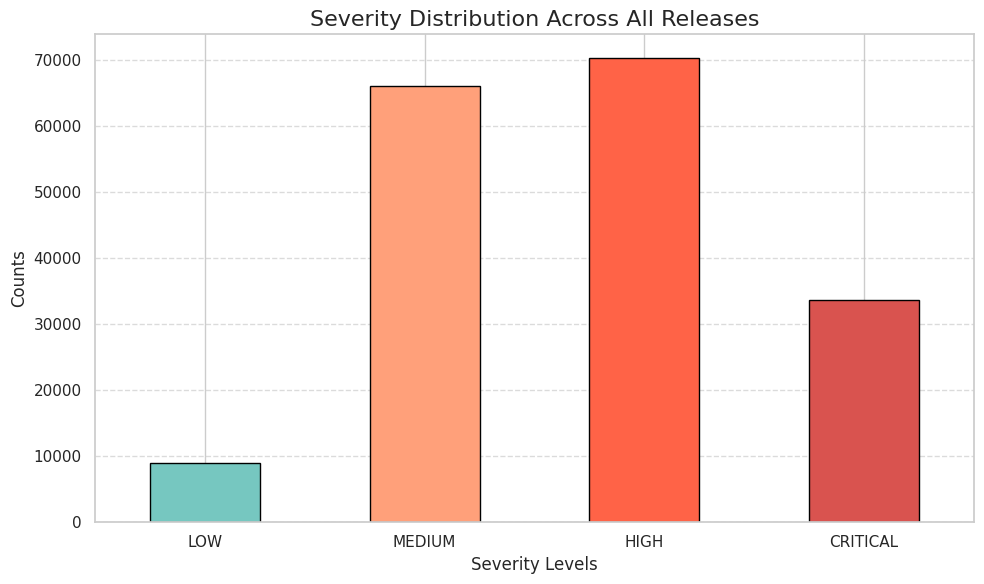

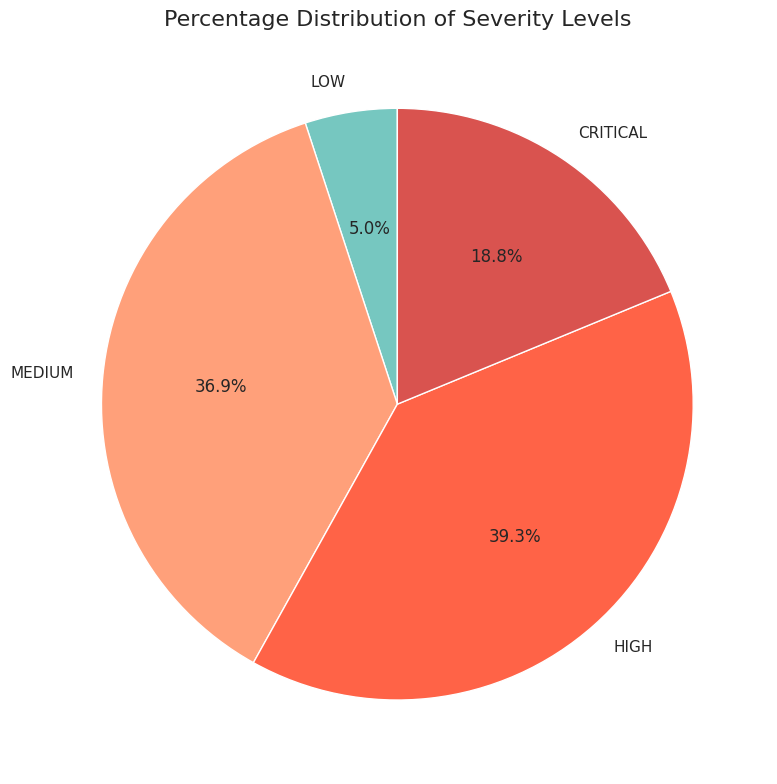

In [ ]:
!pip install matplotlib pandas

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Sum the counts of each severity across all releases
severity_counts = dataset_onlycve[['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']].sum()

# Bar Chart for Severity Distribution
plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar', color=['#76c7c0', '#ffa07a', '#ff6347', '#d9534f'], edgecolor='black')
plt.title('Severity Distribution Across All Releases', fontsize=16)
plt.xlabel('Severity Levels', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart for Severity Percentage Distribution
plt.figure(figsize=(8, 8))
severity_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#76c7c0', '#ffa07a', '#ff6347', '#d9534f'],
    labels=['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']
)
plt.title('Percentage Distribution of Severity Levels', fontsize=16)
plt.ylabel('')  # Remove y-axis label for a cleaner look
plt.tight_layout()
plt.show()


<ipython-input-20-5fe6f7f29d23>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


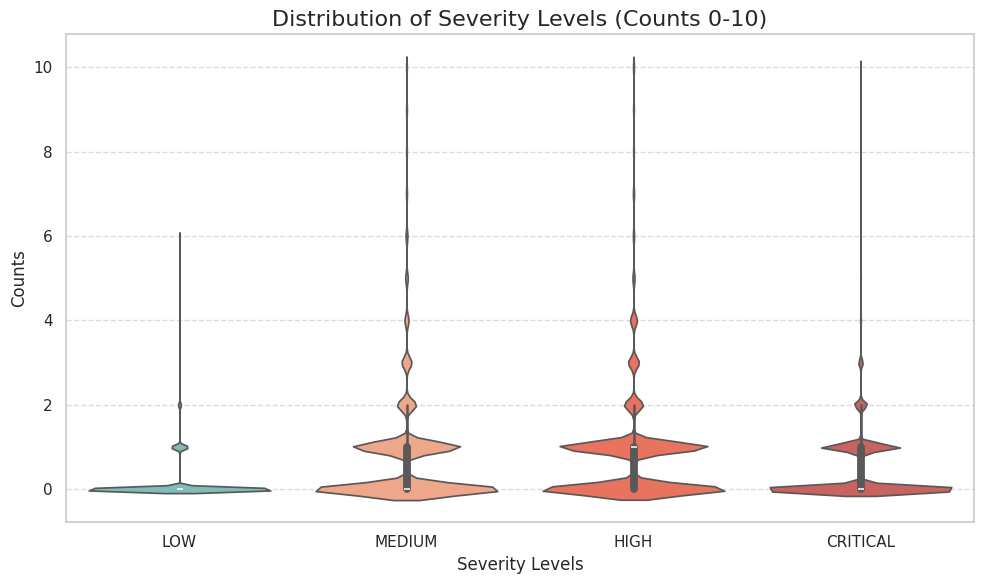

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
severity_columns = ['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']
severity_data = pd.melt(
    dataset_onlycve[severity_columns],
    var_name='Severity Level',
    value_name='Counts'
)

# Filter for counts between 0 and 10
severity_data = severity_data[severity_data['Counts'].between(0, 10)]

# Violin Plot for Severity Distribution (0-10 Counts)
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Severity Level',
    y='Counts',
    data=severity_data,
    palette=['#76c7c0', '#ffa07a', '#ff6347', '#d9534f']
)
plt.title('Distribution of Severity Levels (Counts 0-10)', fontsize=16)
plt.xlabel('Severity Levels', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#https://ieeexplore.ieee.org/abstract/document/10397701?casa_token=poimuetCywQAAAAA:qGz-uYD084dgcJz9cyjiPdBG7ktMZ9vLSaEDRsIHSpM3WzOgOE0j5OcQv0l5_33YrUto1H5Btg

# Define base scores for severity levels
base_scores = {'LOW': 3.0, 'MEDIUM': 5.5, 'HIGH': 8.0, 'CRITICAL': 9.5, 'NONE': 0.0}

# Calculate a weighted average score for each artifact
dataset_onlycve['Common Score'] = (
    dataset_onlycve['LOW'] * base_scores['LOW'] +
    dataset_onlycve['MEDIUM'] * base_scores['MEDIUM'] +
    dataset_onlycve['HIGH'] * base_scores['HIGH'] +
    dataset_onlycve['CRITICAL'] * base_scores['CRITICAL']
) / dataset_onlycve[['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']].sum(axis=1)

# Fill NaN values with 0 for artifacts without vulnerabilities
dataset_onlycve['Common Score'] = dataset_onlycve['Common Score'].fillna(0)



In [ ]:
# https://ieeexplore.ieee.org/abstract/document/10397701?casa_token=poimuetCywQAAAAA:qGz-uYD084dgcJz9cyjiPdBG7ktMZ9vLSaEDRsIHSpM3WzOgOE0j5OcQv0l5_33YrUto1H5Btg

# Define base scores for severity levels
base_scores = {'LOW': 3.0, 'MEDIUM': 5.5, 'HIGH': 8.0, 'CRITICAL': 9.5, 'NONE': 0.0}

# Calculate the total vulnerability contribution for each artifact
dataset_onlycve['Total Contribution'] = (
    dataset_onlycve['LOW'] * base_scores['LOW'] +
    dataset_onlycve['MEDIUM'] * base_scores['MEDIUM'] +
    dataset_onlycve['HIGH'] * base_scores['HIGH'] +
    dataset_onlycve['CRITICAL'] * base_scores['CRITICAL']
)

# Fill NaN values with 0 for artifacts without vulnerabilities
dataset_onlycve['Total Contribution'] = dataset_onlycve['Total Contribution'].fillna(0)

# Output the dataset to inspect results
dataset_onlycve


,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,cve_entries,LOW,MEDIUM,HIGH,CRITICAL,Common Score,Total Contribution
0,ai.djl:api:0.10.0,0,"{'numberMissedRelease': '20', 'outdatedTimeInM...",20,107200281000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1614123621000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5
1,ai.djl:api:0.11.0,1,"{'numberMissedRelease': '19', 'outdatedTimeInM...",19,101414192000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1619909710000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5
2,ai.djl:api:0.12.0,0,"{'numberMissedRelease': '18', 'outdatedTimeInM...",18,95605606000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1625718296000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5
3,ai.djl:api:0.13.0,0,"{'numberMissedRelease': '17', 'outdatedTimeInM...",17,87342127000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1633981775000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5
4,ai.djl:api:0.14.0,0,"{'numberMissedRelease': '16', 'outdatedTimeInM...",16,84822389000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1636501513000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77388,xerces:xercesImpl:2.7.1,0,"{'numberMissedRelease': '11', 'outdatedTimeInM...",11,510594550000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1132684112000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0,6.5,32.5
77389,xerces:xercesImpl:2.8.0,18,"{'numberMissedRelease': '9', 'outdatedTimeInMs...",9,498577537000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1144701125000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0,6.5,32.5
77390,xerces:xercesImpl:2.8.1,19,"{'numberMissedRelease': '8', 'outdatedTimeInMs...",8,483056110000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1160222552000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0,6.5,32.5
77391,xerces:xercesImpl:2.9.0,0,"{'numberMissedRelease': '7', 'outdatedTimeInMs...",7,420379122000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1222899540000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0,6.5,32.5


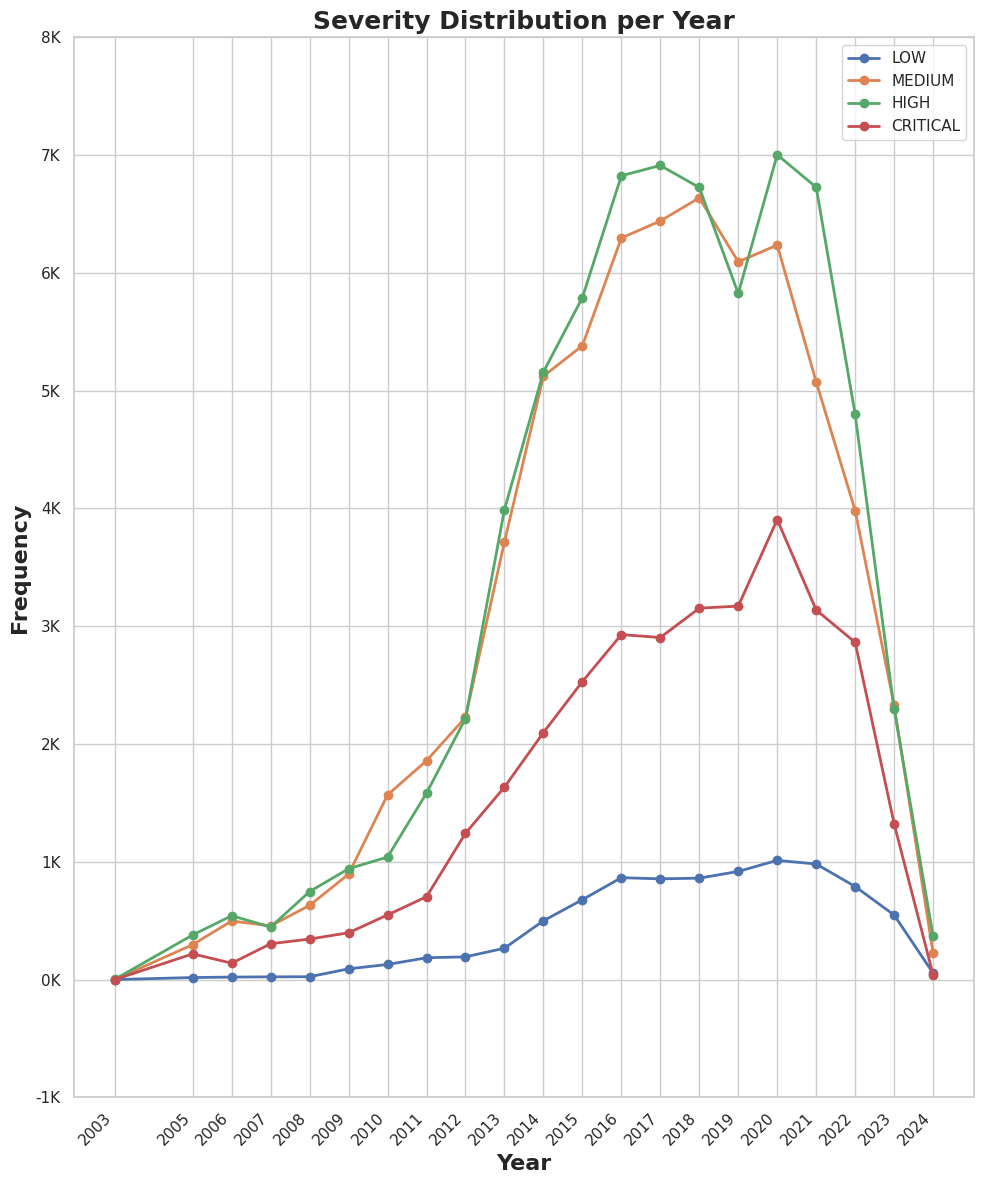

In [ ]:
# Install necessary libraries (if not already installed)
!pip install matplotlib pandas

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt


# Convert Unix millisecond timestamp to datetime
dataset_onlycve['Timestamp'] = pd.to_datetime(dataset_onlycve['Timestamp'], unit='ms')

# Extract the year from the Timestamp
dataset_onlycve['Year'] = dataset_onlycve['Timestamp'].dt.year

# Group by Year and aggregate severity counts
grouped_df = dataset_onlycve.groupby('Year')[['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']].sum()

# Create the line graph (no background)
fig, ax = plt.subplots(figsize=(10, 12))

# Plot the line graph for each severity level
grouped_df.plot(kind='line', ax=ax, marker='o', linewidth=2, markersize=6)

# Title and labels with larger font size for visibility
ax.set_title('Severity Distribution per Year', fontsize=18, fontweight='bold')
ax.set_xlabel('Year', fontsize=16, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=16, fontweight='bold')

# Set y-axis labels to show counts per thousand (convert from count to thousands)
ax.set_yticks(ax.get_yticks())  # Ensures the ticks remain
ax.set_yticklabels([f'{int(x / 1000)}K' for x in ax.get_yticks()])

# Ensure all years appear on the x-axis
ax.set_xticks(grouped_df.index)  # Set x-ticks to the exact years in the dataset
ax.set_xticklabels(grouped_df.index, rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Remove background color
fig.patch.set_facecolor('none')  # Remove canvas background
ax.set_facecolor('none')  # Remove plot area background

# Display the plot with tight layout for better spacing
plt.tight_layout()
plt.show()


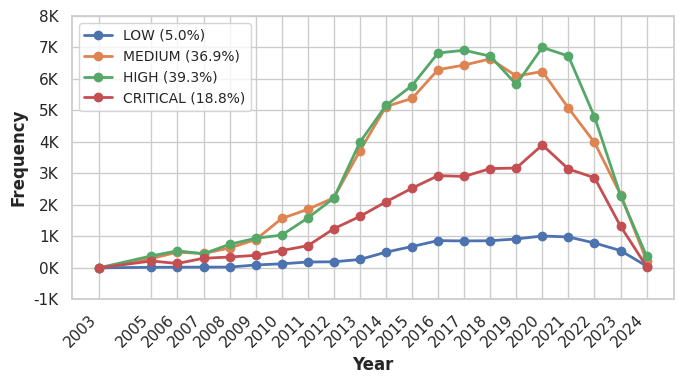

In [ ]:

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Convert Unix millisecond timestamp to datetime
dataset_onlycve['Timestamp'] = pd.to_datetime(dataset_onlycve['Timestamp'], unit='ms')

# Extract the year from the Timestamp
dataset_onlycve['Year'] = dataset_onlycve['Timestamp'].dt.year

# Group by Year and aggregate severity counts
grouped_df = dataset_onlycve.groupby('Year')[['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']].sum()

# Calculate proportions
severity_totals = grouped_df.sum()
proportions = (severity_totals / severity_totals.sum()) * 100

# Create the line graph with adjusted figure size
fig, ax = plt.subplots(figsize=(7, 4))  # Adjusted size for two-column layout

# Plot the line graph for each severity level
grouped_df.plot(kind='line', ax=ax, marker='o', linewidth=2, markersize=6)

#ax.set_title('Severity Distribution per Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Set y-axis labels to show counts per thousand (convert from count to thousands)
ax.set_yticks(ax.get_yticks())  # Ensures the ticks remain
ax.set_yticklabels([f'{int(x / 1000)}K' for x in ax.get_yticks()])

# Ensure all years appear on the x-axis
ax.set_xticks(grouped_df.index)  # Set x-ticks to the exact years in the dataset
ax.set_xticklabels(grouped_df.index, rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add proportions to the legend labels
legend_labels = [f'{label} ({proportions[label]:.1f}%)' for label in grouped_df.columns]
ax.legend(legend_labels, fontsize=10)

# Remove background color
fig.patch.set_facecolor('none')  # Remove canvas background
ax.set_facecolor('none')  # Remove plot area background

# Display the plot with tight layout for better spacing
plt.tight_layout()

# Save the plot with 1200 dpi resolution
plt.savefig('severity_distribution_per_year.png', dpi=2400)

# Show the plot
plt.show()


<ipython-input-25-0e5902d20ab7>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = dataset_onlycve.groupby('Time Interval')[['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']].sum()


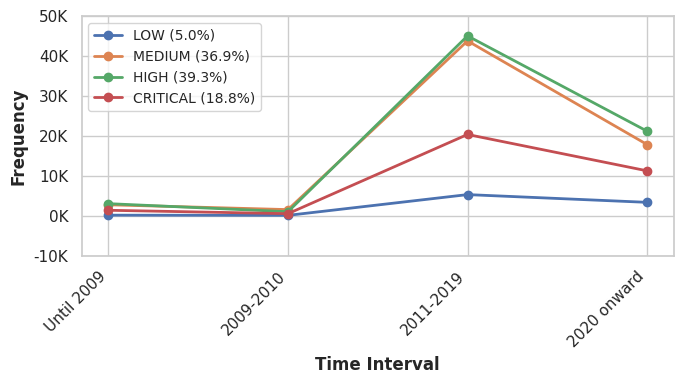

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Convert Unix millisecond timestamp to datetime
dataset_onlycve['Timestamp'] = pd.to_datetime(dataset_onlycve['Timestamp'], unit='ms')

# Extract the year from the Timestamp
dataset_onlycve['Year'] = dataset_onlycve['Timestamp'].dt.year

# Categorize years into custom time intervals
def categorize_year(year):
    if year <= 2009:
        return 'Until 2009'
    elif year == 2010:
        return '2009-2010'
    elif 2011 <= year <= 2019:
        return '2011-2019'
    else:
        return '2020 onward'

dataset_onlycve['Time Interval'] = dataset_onlycve['Year'].apply(categorize_year)

# Ensure the 'Time Interval' is categorical with a specific order
time_intervals = ['Until 2009', '2009-2010', '2011-2019', '2020 onward']
dataset_onlycve['Time Interval'] = pd.Categorical(dataset_onlycve['Time Interval'], categories=time_intervals, ordered=True)

# Group by the 'Time Interval' and aggregate severity counts
grouped_df = dataset_onlycve.groupby('Time Interval')[['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']].sum()

# Calculate proportions
severity_totals = grouped_df.sum()
proportions = (severity_totals / severity_totals.sum()) * 100

# Create the line graph with adjusted figure size
fig, ax = plt.subplots(figsize=(7, 4))  # Adjusted size for two-column layout

# Plot the line graph for each severity level
grouped_df.plot(kind='line', ax=ax, marker='o', linewidth=2, markersize=6)

# Set axis labels and title
ax.set_xlabel('Time Interval', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Set y-axis labels to show counts per thousand (convert from count to thousands)
ax.set_yticks(ax.get_yticks())  # Ensures the ticks remain
ax.set_yticklabels([f'{int(x / 1000)}K' for x in ax.get_yticks()])

# Ensure all time intervals appear on the x-axis in the correct order
ax.set_xticks(range(len(time_intervals)))  # Set x-ticks to the range of time intervals
ax.set_xticklabels(time_intervals, rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add proportions to the legend labels
legend_labels = [f'{label} ({proportions[label]:.1f}%)' for label in grouped_df.columns]
ax.legend(legend_labels, fontsize=10)

# Remove background color
fig.patch.set_facecolor('none')  # Remove canvas background
ax.set_facecolor('none')  # Remove plot area background

# Display the plot with tight layout for better spacing
plt.tight_layout()

# Save the plot with 1200 dpi resolution
plt.savefig('severity_distribution_per_time_interval.png', dpi=2400)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np


# Define bin edges for equal intervals from 0 to 30
first_bins = np.linspace(0, 30, 5)  # This creates bins: 0-7.5, 7.5-15, etc., up to 30

# Combine first_bins and add a single category for values greater than 30
bins = np.concatenate([first_bins[:-1], [30, float('inf')]])  # All values greater than 30 are treated as ">30"

# Define the labels for bins
labels = ['0-7.5', '7.5-15', '15-22.5', '22.5-30', '>30']

# Create the bins and label them
dataset_onlycve['Contribution_Binned'] = pd.cut(dataset_onlycve['Total Contribution'], bins=bins, labels=labels, include_lowest=True)

# Check the result
dataset_onlycve.head()


,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,cve_entries,LOW,MEDIUM,HIGH,CRITICAL,Common Score,Total Contribution,Year,Time Interval,Contribution_Binned
0,ai.djl:api:0.10.0,0,"{'numberMissedRelease': '20', 'outdatedTimeInM...",20,107200281000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-02-23 23:40:21,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5,2021,2020 onward,7.5-15
1,ai.djl:api:0.11.0,1,"{'numberMissedRelease': '19', 'outdatedTimeInM...",19,101414192000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-05-01 22:55:10,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5,2021,2020 onward,7.5-15
2,ai.djl:api:0.12.0,0,"{'numberMissedRelease': '18', 'outdatedTimeInM...",18,95605606000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-07-08 04:24:56,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5,2021,2020 onward,7.5-15
3,ai.djl:api:0.13.0,0,"{'numberMissedRelease': '17', 'outdatedTimeInM...",17,87342127000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-10-11 19:49:35,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5,2021,2020 onward,7.5-15
4,ai.djl:api:0.14.0,0,"{'numberMissedRelease': '16', 'outdatedTimeInM...",16,84822389000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-11-09 23:45:13,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5,2021,2020 onward,7.5-15


In [ ]:
from google.colab import files
dataset_onlycve.to_csv('dataset_onlycve.csv', index=False)
files. download('dataset_onlycve.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dataset_onlycve['Contribution_Binned'].value_counts()

,count
Contribution_Binned,
7.5-15,41016
0-7.5,17913
>30,7745
15-22.5,7586
22.5-30,3133


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'outdatedTimeInMs' from milliseconds to days
dataset_onlycve['outdatedTimeInDays'] = dataset_onlycve['outdatedTimeInMs'] / (1000 * 60 * 60 * 24)

# Group by the 'Contribution_Binned' and calculate mean and std for the specified columns
grouped = dataset_onlycve.groupby('Contribution_Binned').agg(
    Popularity_mean=('Popularity', 'mean'),
    Popularity_std=('Popularity', 'std'),
    numberMissedRelease_mean=('numberMissedRelease', 'mean'),
    numberMissedRelease_std=('numberMissedRelease', 'std'),
    outdatedTimeInDays_mean=('outdatedTimeInDays', 'mean'),
    outdatedTimeInDays_std=('outdatedTimeInDays', 'std')
).reset_index()

# Display the result
grouped


<ipython-input-29-dc9fdf80beca>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dataset_onlycve.groupby('Contribution_Binned').agg(


,Contribution_Binned,Popularity_mean,Popularity_std,numberMissedRelease_mean,numberMissedRelease_std,outdatedTimeInDays_mean,outdatedTimeInDays_std
0,0-7.5,9.718752,677.174954,185.507899,307.617950,1822.929347,1286.233960
1,7.5-15,6.659743,162.601833,280.070387,450.134753,2046.038593,1215.055237
2,15-22.5,7.316636,97.576923,155.547588,153.009631,1972.528736,1282.988767
3,22.5-30,9.090648,119.934263,150.601341,177.182102,2332.699480,1478.889480
4,>30,13.270755,460.449215,141.282892,108.042001,2637.282861,1382.657673


In [ ]:
dataset_onlycve

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,...,LOW,MEDIUM,HIGH,CRITICAL,Common Score,Total Contribution,Year,Time Interval,Contribution_Binned,outdatedTimeInDays
0,ai.djl:api:0.10.0,0,"{'numberMissedRelease': '20', 'outdatedTimeInM...",20,107200281000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-02-23 23:40:21,1,...,0,0,0,1,9.5,9.5,2021,2020 onward,7.5-15,1240.743993
1,ai.djl:api:0.11.0,1,"{'numberMissedRelease': '19', 'outdatedTimeInM...",19,101414192000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-05-01 22:55:10,1,...,0,0,0,1,9.5,9.5,2021,2020 onward,7.5-15,1173.775370
2,ai.djl:api:0.12.0,0,"{'numberMissedRelease': '18', 'outdatedTimeInM...",18,95605606000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-07-08 04:24:56,1,...,0,0,0,1,9.5,9.5,2021,2020 onward,7.5-15,1106.546366
3,ai.djl:api:0.13.0,0,"{'numberMissedRelease': '17', 'outdatedTimeInM...",17,87342127000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-10-11 19:49:35,1,...,0,0,0,1,9.5,9.5,2021,2020 onward,7.5-15,1010.904248
4,ai.djl:api:0.14.0,0,"{'numberMissedRelease': '16', 'outdatedTimeInM...",16,84822389000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-11-09 23:45:13,1,...,0,0,0,1,9.5,9.5,2021,2020 onward,7.5-15,981.740613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77388,xerces:xercesImpl:2.7.1,0,"{'numberMissedRelease': '11', 'outdatedTimeInM...",11,510594550000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,2005-11-22 18:28:32,5,...,0,3,2,0,6.5,32.5,2005,Until 2009,>30,5909.659144
77389,xerces:xercesImpl:2.8.0,18,"{'numberMissedRelease': '9', 'outdatedTimeInMs...",9,498577537000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,2006-04-10 20:32:05,5,...,0,3,2,0,6.5,32.5,2006,Until 2009,>30,5770.573345
77390,xerces:xercesImpl:2.8.1,19,"{'numberMissedRelease': '8', 'outdatedTimeInMs...",8,483056110000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,2006-10-07 12:02:32,5,...,0,3,2,0,6.5,32.5,2006,Until 2009,>30,5590.927199
77391,xerces:xercesImpl:2.9.0,0,"{'numberMissedRelease': '7', 'outdatedTimeInMs...",7,420379122000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,2008-10-01 22:19:00,5,...,0,3,2,0,6.5,32.5,2008,Until 2009,>30,4865.499097


In [ ]:
big_dataset

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,Timestamp1,Year,Time Gap (Days),Time Interval,Releases per Day,Releases per Day_speed,Releases per Day_speed
0,academy.compose.companion:multi-fab:1.2.3,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",multi-fab,academy.compose.companion:multi-fab,1610606425000,2021-01-14 06:40:25,2021,6.0,2021 onward,inf,inf,inf
1,acegisecurity:acegi-security:0.6.1,0,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,31303316000,"{\\""cve\\"":[]}",acegi-security,acegisecurity:acegi-security,1122949594000,2005-08-02 02:26:34,2005,0.0,Until 2010,0.111111,0.111111,0.111111
2,acegisecurity:acegi-security:0.7.0,0,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,31303316000,"{\\""cve\\"":[]}",acegi-security,acegisecurity:acegi-security,1122949594000,2005-08-02 02:26:34,2005,0.0,Until 2010,0.111111,0.111111,0.111111
3,acegisecurity:acegi-security:0.8.0,0,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,31303316000,"{\\""cve\\"":[]}",acegi-security,acegisecurity:acegi-security,1122949594000,2005-08-02 02:26:34,2005,0.0,Until 2010,0.111111,0.111111,0.111111
4,acegisecurity:acegi-security:0.8.1,0,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,31303316000,"{\\""cve\\"":[]}",acegi-security,acegisecurity:acegi-security,1122949594000,2005-08-02 02:26:34,2005,0.0,Until 2010,0.111111,0.111111,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10601838,zone.wmj:user-agent-util:1.2.5,0,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,15267459000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1640098046000,2021-12-21 14:47:26,2021,20.0,2021 onward,0.056250,0.056250,0.056250
10601839,zone.wmj:user-agent-util:1.2.6,0,"{'numberMissedRelease': '5', 'outdatedTimeInMs...",5,13540473000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1641825032000,2022-01-10 14:30:32,2022,19.0,2021 onward,0.056250,0.056250,0.056250
10601840,zone.wmj:user-agent-util:1.2.7,0,"{'numberMissedRelease': '4', 'outdatedTimeInMs...",4,11492319000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1643873186000,2022-02-03 07:26:26,2022,23.0,2021 onward,0.056250,0.056250,0.056250
10601841,zone.wmj:user-agent-util:1.2.8,0,"{'numberMissedRelease': '3', 'outdatedTimeInMs...",3,9912078000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1645453427000,2022-02-21 14:23:47,2022,18.0,2021 onward,0.056250,0.056250,0.056250


In [ ]:
import pandas as pd
big_dataset= pd.read_csv('/content/drive/MyDrive/Computer Engineering /Three_main_dataset/merged_df.csv')

In [ ]:
big_dataset

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp
0,HTTPClient:HTTPClient:0.3-3,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",HTTPClient,HTTPClient:HTTPClient,1122887875000
1,abbot:abbot:0.12.3,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,320049365000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1122887876000
2,abbot:abbot:0.13.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,320049364000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1122887877000
3,abbot:abbot:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",abbot,abbot:abbot,1442937241000
4,abbot:costello:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",costello,abbot:costello,1443086506000
...,...,...,...,...,...,...,...,...,...
14459134,zone.wmj:user-agent-util:1.2.9,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,8373804000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1646991701000
14459135,zone.wmj:user-agent-util:2.0.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1655365505000
14459136,zw.co.paynow:java-sdk:1.0.0,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,11996676000,"{\\""cve\\"":[]}",java-sdk,zw.co.paynow:java-sdk,1548509171000
14459137,zw.co.paynow:java-sdk:1.1.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,6831477000,"{\\""cve\\"":[]}",java-sdk,zw.co.paynow:java-sdk,1553674370000


In [ ]:
import pandas as pd

# Merge the datasets based on the ReleaseID column
merged_dataset = pd.merge(
    big_dataset,
    dataset_onlycve[['ReleaseID', 'LOW', 'MEDIUM', 'HIGH', 'CRITICAL',
                     'Common Score', 'Total Contribution', 'Year',
                     'Contribution_Binned', 'outdatedTimeInDays']],
    on='ReleaseID',  # Join on the ReleaseID column
    how='left'  # Use left join
)

# Handle categorical columns
for col in merged_dataset.select_dtypes(include=['category']).columns:
    # Add 0 to the categories if it's not already included
    if 0 not in merged_dataset[col].cat.categories:
        merged_dataset[col] = merged_dataset[col].cat.add_categories([0])

# Fill NaN values with zero
merged_dataset = merged_dataset.fillna(0)

# Display the merged dataset
merged_dataset.head()


NameError: name 'dataset_onlycve' is not defined

In [ ]:
merged_dataset

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,LOW,MEDIUM,HIGH,CRITICAL,Common Score,Total Contribution,Year,Contribution_Binned,outdatedTimeInDays
0,HTTPClient:HTTPClient:0.3-3,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",HTTPClient,HTTPClient:HTTPClient,1122887875000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,abbot:abbot:0.12.3,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,320049365000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1122887876000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,abbot:abbot:0.13.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,320049364000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1122887877000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,abbot:abbot:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",abbot,abbot:abbot,1442937241000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,abbot:costello:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",costello,abbot:costello,1443086506000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459134,zone.wmj:user-agent-util:1.2.9,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,8373804000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1646991701000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
14459135,zone.wmj:user-agent-util:2.0.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1655365505000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
14459136,zw.co.paynow:java-sdk:1.0.0,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,11996676000,"{\\""cve\\"":[]}",java-sdk,zw.co.paynow:java-sdk,1548509171000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
14459137,zw.co.paynow:java-sdk:1.1.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,6831477000,"{\\""cve\\"":[]}",java-sdk,zw.co.paynow:java-sdk,1553674370000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [ ]:
# Sort the dataset by 'artifact' and then by 'Timestamp' for chronological order within each artifact
merged_dataset_sorted = merged_dataset.sort_values(by=['artifact', 'Timestamp'], ascending=[True, True])



In [ ]:
merged_dataset_sorted

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,LOW,MEDIUM,HIGH,CRITICAL,Common Score,Total Contribution,Year,Contribution_Binned,outdatedTimeInDays
0,HTTPClient:HTTPClient:0.3-3,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",HTTPClient,HTTPClient:HTTPClient,1122887875000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,abbot:abbot:0.12.3,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,320049365000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1122887876000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,abbot:abbot:0.13.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,320049364000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1122887877000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,abbot:abbot:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",abbot,abbot:abbot,1442937241000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,abbot:costello:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",costello,abbot:costello,1443086506000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459126,zone.wmj:user-agent-util:1.2.10,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,4634927000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1650730578000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
14459135,zone.wmj:user-agent-util:2.0.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1655365505000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
14459136,zw.co.paynow:java-sdk:1.0.0,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,11996676000,"{\\""cve\\"":[]}",java-sdk,zw.co.paynow:java-sdk,1548509171000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
14459137,zw.co.paynow:java-sdk:1.1.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,6831477000,"{\\""cve\\"":[]}",java-sdk,zw.co.paynow:java-sdk,1553674370000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [ ]:
filtered_df = merged_dataset_sorted[merged_dataset_sorted['artifact'] == 'ai.chronon:online_2.12']

In [ ]:
filtered_df

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,LOW,MEDIUM,HIGH,CRITICAL,Common Score,Total Contribution,Year,Contribution_Binned,outdatedTimeInDays
2566,ai.chronon:online_2.12:0.0.6,0,"{'numberMissedRelease': '75', 'outdatedTimeInM...",75,65586555000,"{\\""cve\\"":[]}",online_2.12,ai.chronon:online_2.12,1658531789000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2577,ai.chronon:online_2.12:0.0.7,0,"{'numberMissedRelease': '74', 'outdatedTimeInM...",74,62909502000,"{\\""cve\\"":[]}",online_2.12,ai.chronon:online_2.12,1661208842000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2586,ai.chronon:online_2.12:0.0.8,0,"{'numberMissedRelease': '73', 'outdatedTimeInM...",73,60497201000,"{\\""cve\\"":[]}",online_2.12,ai.chronon:online_2.12,1663621143000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2588,ai.chronon:online_2.12:0.0.9,0,"{'numberMissedRelease': '72', 'outdatedTimeInM...",72,59887849000,"{\\""cve\\"":[]}",online_2.12,ai.chronon:online_2.12,1664230495000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2518,ai.chronon:online_2.12:0.0.10,0,"{'numberMissedRelease': '71', 'outdatedTimeInM...",71,58520186000,"{\\""cve\\"":[]}",online_2.12,ai.chronon:online_2.12,1665598158000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,ai.chronon:online_2.12:0.0.75,0,"{'numberMissedRelease': '4', 'outdatedTimeInMs...",4,7876354000,"{\\""cve\\"":[]}",online_2.12,ai.chronon:online_2.12,1716241990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2583,ai.chronon:online_2.12:0.0.76,0,"{'numberMissedRelease': '3', 'outdatedTimeInMs...",3,6509518000,"{\\""cve\\"":[]}",online_2.12,ai.chronon:online_2.12,1717608826000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2584,ai.chronon:online_2.12:0.0.77,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,2943707000,"{\\""cve\\"":[]}",online_2.12,ai.chronon:online_2.12,1721174637000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2585,ai.chronon:online_2.12:0.0.78,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,1219378000,"{\\""cve\\"":[]}",online_2.12,ai.chronon:online_2.12,1722898966000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [ ]:
import pandas as pd

# Ensure we don't modify the original dataset
df = merged_dataset_sorted.copy()

# Sort DataFrame by artifact and Timestamp (done only once)
df = df.sort_values(by=["artifact", "Timestamp"])

# Compute the consecutive change in Total Contribution and Popularity
df["Total_Contribution_Change"] = df.groupby("artifact")["Total Contribution"].diff().fillna(0)
df["Popularity_Change"] = df.groupby("artifact")["Popularity"].diff().fillna(0)

# Identify if the Total Contribution and Popularity are always zero
zero_total_contrib = df.groupby("artifact")["Total Contribution"].apply(lambda x: (x == 0).all())
zero_popularity = df.groupby("artifact")["Popularity"].apply(lambda x: (x == 0).all())

# Compute net change for Total Contribution and Popularity for each artifact
artifact_changes = df.groupby("artifact")[["Total_Contribution_Change", "Popularity_Change"]].sum()

# Rename columns for clarity
artifact_changes = artifact_changes.rename(columns={
    "Total_Contribution_Change": "Net_Total_Contribution_Change",
    "Popularity_Change": "Net_Popularity_Change"
})

# Create labels for Total Contribution and Popularity
artifact_changes["Total_Contribution_Label"] = "Change"
artifact_changes["Popularity_Label"] = "Change"

# Apply labels based on conditions for Total Contribution
artifact_changes.loc[zero_total_contrib, "Total_Contribution_Label"] = "Always Zero"
artifact_changes.loc[(artifact_changes["Net_Total_Contribution_Change"] == 0) & (artifact_changes["Total_Contribution_Label"] != "Always Zero"), "Total_Contribution_Label"] = "Constant"

# Apply labels based on conditions for Popularity
artifact_changes.loc[zero_popularity, "Popularity_Label"] = "Always Zero"
artifact_changes.loc[(artifact_changes["Net_Popularity_Change"] == 0) & (artifact_changes["Popularity_Label"] != "Always Zero"), "Popularity_Label"] = "Constant"

# Reset index for readability
artifact_changes = artifact_changes.reset_index()

# Display the final output
artifact_changes


,artifact,Net_Total_Contribution_Change,Net_Popularity_Change,Total_Contribution_Label,Popularity_Label
0,HTTPClient:HTTPClient,0.0,0.0,Always Zero,Always Zero
1,abbot:abbot,0.0,0.0,Always Zero,Always Zero
2,abbot:costello,0.0,0.0,Always Zero,Always Zero
3,academy.alex:custommatcher,0.0,0.0,Always Zero,Always Zero
4,academy.compose.companion:multi-fab,0.0,0.0,Always Zero,Always Zero
...,...,...,...,...,...
634998,zone.src.sheaf:sheaf-parent,0.0,0.0,Always Zero,Always Zero
634999,zone.src.sheaf:web-sheaf,0.0,0.0,Always Zero,Always Zero
635000,zone.stefan.dev:geocode,0.0,0.0,Always Zero,Always Zero
635001,zone.wmj:user-agent-util,0.0,0.0,Always Zero,Always Zero


In [ ]:
import pandas as pd

# Ensure we don't modify the original dataset
df = merged_dataset_sorted.copy()

# Convert Date and Time columns to datetime format
df["Release_Datetime"] = pd.to_datetime(df["Timestamp"], unit="ms")

# Extract year for yearly statistics
df["Release_Year"] = df["Release_Datetime"].dt.year

# Sort DataFrame by artifact and Release_Datetime
df = df.sort_values(by=["artifact", "Release_Datetime"])

# Compute the consecutive time differences in days
df["Time_Gap"] = df.groupby("artifact")["Release_Datetime"].diff().dt.total_seconds().div(86400)  # Convert seconds to days

# Compute artifact release statistics
artifact_stats = df.groupby("artifact").agg(
    avg_time_gap=("Time_Gap", lambda x: x.mean(skipna=True)),  # Mean gap between releases
    first_release=("Release_Datetime", "first"),  # First release timestamp
    last_release=("Release_Datetime", "last"),  # Last release timestamp
    num_releases=("Release_Datetime", "count"),  # Total number of releases
)

# Compute the release speed (releases per day)
artifact_stats["lifespan_days"] = (artifact_stats["last_release"] - artifact_stats["first_release"]).dt.total_seconds().div(86400)
artifact_stats["lifespan_years"] = artifact_stats["lifespan_days"] / 365  # Convert lifespan to years
artifact_stats["releases_per_day"] = artifact_stats["num_releases"] / artifact_stats["lifespan_days"]
artifact_stats["releases_per_year"] = artifact_stats["num_releases"] / artifact_stats["lifespan_years"]

# Handle cases where lifespan is zero (single release artifacts)
artifact_stats["releases_per_day"] = artifact_stats["releases_per_day"].fillna(0)
artifact_stats["releases_per_year"] = artifact_stats["releases_per_year"].fillna(0)

# Compute the number of releases per year
releases_per_year = df.groupby(["artifact", "Release_Year"]).size().reset_index(name="num_releases_per_year")

# Aggregate releases per year to get a unique record per artifact (sum the releases per artifact)
releases_per_year_agg = releases_per_year.groupby("artifact")["num_releases_per_year"].sum().reset_index()

# Compute the consecutive change in Total Contribution and Popularity
df["Total_Contribution_Change"] = df.groupby("artifact")["Total Contribution"].diff().fillna(0)
df["Popularity_Change"] = df.groupby("artifact")["Popularity"].diff().fillna(0)

# Identify if the Total Contribution and Popularity are always zero
zero_total_contrib = df.groupby("artifact")["Total Contribution"].apply(lambda x: (x == 0).all())
zero_popularity = df.groupby("artifact")["Popularity"].apply(lambda x: (x == 0).all())

# Compute net change for Total Contribution and Popularity for each artifact
artifact_changes = df.groupby("artifact")[["Total_Contribution_Change", "Popularity_Change"]].sum()

# Rename columns for clarity
artifact_changes = artifact_changes.rename(columns={
    "Total_Contribution_Change": "Net_Total_Contribution_Change",
    "Popularity_Change": "Net_Popularity_Change"
})

# Create labels for Total Contribution and Popularity
artifact_changes["Total_Contribution_Label"] = "Change"
artifact_changes["Popularity_Label"] = "Change"

# Apply labels based on conditions for Total Contribution
artifact_changes.loc[zero_total_contrib, "Total_Contribution_Label"] = "Always Zero"
artifact_changes.loc[(artifact_changes["Net_Total_Contribution_Change"] == 0) & (artifact_changes["Total_Contribution_Label"] != "Always Zero"), "Total_Contribution_Label"] = "Constant"

# Apply labels based on conditions for Popularity
artifact_changes.loc[zero_popularity, "Popularity_Label"] = "Always Zero"
artifact_changes.loc[(artifact_changes["Net_Popularity_Change"] == 0) & (artifact_changes["Popularity_Label"] != "Always Zero"), "Popularity_Label"] = "Constant"

# Merge all computed statistics
artifact_summary = artifact_stats.merge(artifact_changes, on="artifact")

# Merge with aggregated releases per year statistics
artifact_summary = artifact_summary.merge(releases_per_year_agg, on="artifact", how="left")

# Reset index for readability
artifact_summary = artifact_summary.reset_index(drop=True)

# Display the final output
artifact_summary


,artifact,avg_time_gap,first_release,last_release,num_releases,lifespan_days,lifespan_years,releases_per_day,releases_per_year,Net_Total_Contribution_Change,Net_Popularity_Change,Total_Contribution_Label,Popularity_Label,num_releases_per_year
0,HTTPClient:HTTPClient,NaN,2005-08-01 09:17:55,2005-08-01 09:17:55,1,0.000000,0.000000,inf,inf,0.0,0.0,Always Zero,Always Zero,1
1,abbot:abbot,1852.137529,2005-08-01 09:17:56,2015-09-22 15:54:01,3,3704.275058,10.148699,0.000810,0.295604,0.0,0.0,Always Zero,Always Zero,3
2,abbot:costello,NaN,2015-09-24 09:21:46,2015-09-24 09:21:46,1,0.000000,0.000000,inf,inf,0.0,0.0,Always Zero,Always Zero,1
3,academy.alex:custommatcher,NaN,2018-05-31 18:57:25,2018-05-31 18:57:25,1,0.000000,0.000000,inf,inf,0.0,0.0,Always Zero,Always Zero,1
4,academy.compose.companion:multi-fab,4.200966,2021-01-05 21:01:38,2021-01-14 06:40:25,3,8.401933,0.023019,0.357061,130.327154,0.0,0.0,Always Zero,Always Zero,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634998,zone.src.sheaf:sheaf-parent,164.839631,2015-01-23 10:37:20,2023-08-21 09:29:38,20,3131.952986,8.580693,0.006386,2.330814,0.0,0.0,Always Zero,Always Zero,20
634999,zone.src.sheaf:web-sheaf,142.358646,2015-01-23 14:53:59,2023-08-21 12:15:54,23,3131.890220,8.580521,0.007344,2.680490,0.0,0.0,Always Zero,Always Zero,23
635000,zone.stefan.dev:geocode,0.093148,2021-01-08 15:30:37,2021-01-08 17:44:45,2,0.093148,0.000255,21.471173,7836.978131,0.0,0.0,Always Zero,Always Zero,2
635001,zone.wmj:user-agent-util,23.216354,2021-09-10 17:26:29,2022-06-16 07:45:05,13,278.596250,0.763277,0.046663,17.031816,0.0,0.0,Always Zero,Always Zero,13


In [ ]:
artifact_summary['Net_Total_Contribution_Change'].describe()

,Net_Total_Contribution_Change
count,635003.000000
mean,-0.024807
std,1.259907
min,-332.500000
25%,0.000000
50%,0.000000
75%,0.000000
max,17.500000


In [ ]:
artifact_summary['Popularity_Label'].value_counts()

,count
Popularity_Label,
Always Zero,521405
Change,82615
Constant,30983


In [ ]:
import pandas as pd

# Fill NaN and inf values with zero in the artifact_summary dataset
artifact_summary['avg_time_gap'] = artifact_summary['avg_time_gap'].fillna(0).replace([float('inf'), -float('inf')], 0)
artifact_summary['releases_per_day'] = artifact_summary['releases_per_day'].fillna(0).replace([float('inf'), -float('inf')], 0)
artifact_summary['releases_per_year'] = artifact_summary['releases_per_year'].fillna(0).replace([float('inf'), -float('inf')], 0)

# Filter out entries with only one release
filtered_artifact = artifact_summary[artifact_summary['num_releases'] > 1]

# Define conditions for net_change_popularity_sum
popularity_conditions = {
    'popularity == 0 and Popularity_Label == "Always Zero"':
        (filtered_artifact['Net_Popularity_Change'] == 0) & (filtered_artifact['Popularity_Label'] == "Always Zero"),

    'popularity == 0 and Popularity_Label == "Constant"':
        (filtered_artifact['Net_Popularity_Change'] == 0) & (filtered_artifact['Popularity_Label'] == "Constant"),

    'popularity < 0': filtered_artifact['Net_Popularity_Change'] < 0,
    'popularity > 0': filtered_artifact['Net_Popularity_Change'] > 0
}

# Define conditions for net_change_gradient_sum
gradient_conditions = {
    'gradient == 0 and Total_Contribution_Label == "Always Zero"':
        (filtered_artifact['Net_Total_Contribution_Change'] == 0) & (filtered_artifact['Total_Contribution_Label'] == "Always Zero"),

    'gradient == 0 and Total_Contribution_Label == "Constant"':
        (filtered_artifact['Net_Total_Contribution_Change'] == 0) & (filtered_artifact['Total_Contribution_Label'] == "Constant"),

    'gradient < 0': filtered_artifact['Net_Total_Contribution_Change'] < 0,
    'gradient > 0': filtered_artifact['Net_Total_Contribution_Change'] > 0
}

# Prepare results
results = []

for pop_key, pop_condition in popularity_conditions.items():
    for grad_key, grad_condition in gradient_conditions.items():
        # Filter data based on conditions
        condition_data = filtered_artifact[pop_condition & grad_condition]

        # Calculate mean and standard deviation for each metric
        metrics = {
            "Condition Combination": f"{pop_key} & {grad_key}",
            "Count": condition_data.shape[0],
            "num_releases (mean ± std)": f"{condition_data['num_releases'].mean():.2f} ± {condition_data['num_releases'].std():.2f}",
            "net_change_gradient_sum (mean ± std)": f"{condition_data['Net_Total_Contribution_Change'].mean():.2f} ± {condition_data['Net_Total_Contribution_Change'].std():.2f}",
            "net_change_popularity_sum (mean ± std)": f"{condition_data['Net_Popularity_Change'].mean():.2f} ± {condition_data['Net_Popularity_Change'].std():.2f}",
            "avg_time_gap (mean ± std)": f"{condition_data['avg_time_gap'].mean():.2f} ± {condition_data['avg_time_gap'].std():.2f}",
            "releases_per_day (mean ± std)": f"{condition_data['releases_per_day'].mean():.2f} ± {condition_data['releases_per_day'].std():.2f}",
        }

        results.append(metrics)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results
results_df


/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2285: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2286: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Condition Combination,Count,"num_releases (mean ± std, CI)","net_change_gradient_sum (mean ± std, CI)","net_change_popularity_sum (mean ± std, CI)","avg_time_gap (mean ± std, CI)","releases_per_day (mean ± std, CI)","releases_per_year (mean ± std, CI)"
0,"popularity == 0 and Popularity_Label == ""Alway...",388633,"21.91 ± 68.38 (21.70, 22.13)","0.00 ± 0.00 (nan, nan)","0.00 ± 0.00 (nan, nan)","94.34 ± 180.98 (93.77, 94.91)","278.95 ± 10235.99 (246.77, 311.14)","101818.54 ± 3736137.86 (90072.20, 113564.87)"
1,"popularity == 0 and Popularity_Label == ""Alway...",173,"48.76 ± 148.78 (26.43, 71.08)","0.00 ± 0.00 (nan, nan)","0.00 ± 0.00 (nan, nan)","106.42 ± 157.67 (82.76, 130.09)","3254.45 ± 22716.86 (-154.65, 6663.55)","1187874.83 ± 8291654.40 (-56447.12, 2432196.79)"
2,"popularity == 0 and Popularity_Label == ""Alway...",275,"61.61 ± 87.42 (51.24, 71.99)","-15.21 ± 23.44 (-17.99, -12.42)","0.00 ± 0.00 (nan, nan)","123.63 ± 179.55 (102.32, 144.95)","0.03 ± 0.05 (0.02, 0.04)","10.81 ± 18.21 (8.65, 12.97)"
3,"popularity == 0 and Popularity_Label == ""Alway...",11,"87.55 ± 133.83 (-2.36, 177.45)","8.14 ± 1.91 (6.85, 9.42)","0.00 ± 0.00 (nan, nan)","76.05 ± 120.80 (-5.10, 157.20)","0.05 ± 0.05 (0.02, 0.08)","17.81 ± 16.50 (6.73, 28.89)"
4,"popularity == 0 and Popularity_Label == ""Const...",21968,"31.20 ± 92.99 (29.98, 32.43)","0.00 ± 0.00 (nan, nan)","0.00 ± 0.00 (nan, nan)","50.12 ± 91.05 (48.92, 51.33)","129.48 ± 9363.07 (5.66, 253.30)","47260.73 ± 3417519.70 (2066.00, 92455.46)"
5,"popularity == 0 and Popularity_Label == ""Const...",17,"87.29 ± 77.36 (47.52, 127.07)","0.00 ± 0.00 (nan, nan)","0.00 ± 0.00 (nan, nan)","62.40 ± 50.42 (36.47, 88.32)","0.03 ± 0.02 (0.02, 0.04)","9.77 ± 6.37 (6.50, 13.04)"
6,"popularity == 0 and Popularity_Label == ""Const...",95,"112.91 ± 178.58 (76.53, 149.28)","-11.73 ± 10.86 (-13.94, -9.52)","0.00 ± 0.00 (nan, nan)","74.75 ± 88.09 (56.81, 92.69)","0.04 ± 0.06 (0.03, 0.06)","15.83 ± 22.04 (11.34, 20.32)"
7,"popularity == 0 and Popularity_Label == ""Const...",2,"5.50 ± 2.12 (-13.56, 24.56)","6.75 ± 1.77 (-9.13, 22.63)","0.00 ± 0.00 (nan, nan)","107.79 ± 152.44 (-1261.83, 1477.41)","172800.00 ± 244376.10 (-2022832.14, 2368432.15)","63072000.99 ± 89197276.41 (-738333731.60, 8644..."
8,popularity < 0 & gradient == 0 and Total_Contr...,3164,"9.38 ± 22.27 (8.61, 10.16)","0.00 ± 0.00 (nan, nan)","-14.60 ± 88.64 (-17.69, -11.51)","114.13 ± 289.83 (104.03, 124.24)","136.68 ± 4445.68 (-18.28, 291.65)","49889.92 ± 1622671.78 (-6672.34, 106452.18)"
9,popularity < 0 & gradient == 0 and Total_Contr...,4,"17.25 ± 22.81 (-19.04, 53.54)","0.00 ± 0.00 (nan, nan)","-6.75 ± 9.54 (-21.92, 8.42)","332.49 ± 286.75 (-123.80, 788.78)","0.01 ± 0.01 (-0.01, 0.02)","3.45 ± 3.49 (-2.11, 9.01)"


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Fill NaN and inf values with zero in the artifact_summary dataset
artifact_summary['avg_time_gap'] = artifact_summary['avg_time_gap'].fillna(0).replace([float('inf'), -float('inf')], 0)
artifact_summary['releases_per_day'] = artifact_summary['releases_per_day'].fillna(0).replace([float('inf'), -float('inf')], 0)
artifact_summary['releases_per_year'] = artifact_summary['releases_per_year'].fillna(0).replace([float('inf'), -float('inf')], 0)

# Filter out entries with only one release
filtered_artifact = artifact_summary[artifact_summary['num_releases'] > 1]

# Define conditions for net_change_popularity_sum
popularity_conditions = {
    'popularity == 0 and Popularity_Label == "Always Zero"':
        (filtered_artifact['Net_Popularity_Change'] == 0) & (filtered_artifact['Popularity_Label'] == "Always Zero"),

    'popularity == 0 and Popularity_Label == "Constant"':
        (filtered_artifact['Net_Popularity_Change'] == 0) & (filtered_artifact['Popularity_Label'] == "Constant"),

    'popularity < 0': filtered_artifact['Net_Popularity_Change'] < 0,
    'popularity > 0': filtered_artifact['Net_Popularity_Change'] > 0
}

# Define conditions for net_change_gradient_sum
gradient_conditions = {
    'gradient == 0 and Total_Contribution_Label == "Always Zero"':
        (filtered_artifact['Net_Total_Contribution_Change'] == 0) & (filtered_artifact['Total_Contribution_Label'] == "Always Zero"),

    'gradient == 0 and Total_Contribution_Label == "Constant"':
        (filtered_artifact['Net_Total_Contribution_Change'] == 0) & (filtered_artifact['Total_Contribution_Label'] == "Constant"),

    'gradient < 0': filtered_artifact['Net_Total_Contribution_Change'] < 0,
    'gradient > 0': filtered_artifact['Net_Total_Contribution_Change'] > 0
}

# Function to calculate confidence interval
def calculate_confidence_interval(data):
    mean = data.mean()
    std_dev = data.std()
    n = len(data)
    confidence_level = 0.95
    ci = stats.t.interval(confidence_level, n-1, loc=mean, scale=std_dev/np.sqrt(n))
    return (mean, std_dev, ci[0], ci[1])  # mean, std deviation, lower CI, upper CI

# Prepare results
results = []

for pop_key, pop_condition in popularity_conditions.items():
    for grad_key, grad_condition in gradient_conditions.items():
        # Filter data based on conditions
        condition_data = filtered_artifact[pop_condition & grad_condition]

        # Calculate mean, standard deviation, and confidence interval for each metric
        metrics = {
            "Condition Combination": f"{pop_key} & {grad_key}",
            "Count": condition_data.shape[0],
            "num_releases (mean ± std, CI)": f"{condition_data['num_releases'].mean():.2f} ± {condition_data['num_releases'].std():.2f} ({calculate_confidence_interval(condition_data['num_releases'])[2]:.2f}, {calculate_confidence_interval(condition_data['num_releases'])[3]:.2f})",
            "net_change_gradient_sum (mean ± std, CI)": f"{condition_data['Net_Total_Contribution_Change'].mean():.2f} ± {condition_data['Net_Total_Contribution_Change'].std():.2f} ({calculate_confidence_interval(condition_data['Net_Total_Contribution_Change'])[2]:.2f}, {calculate_confidence_interval(condition_data['Net_Total_Contribution_Change'])[3]:.2f})",
            "net_change_popularity_sum (mean ± std, CI)": f"{condition_data['Net_Popularity_Change'].mean():.2f} ± {condition_data['Net_Popularity_Change'].std():.2f} ({calculate_confidence_interval(condition_data['Net_Popularity_Change'])[2]:.2f}, {calculate_confidence_interval(condition_data['Net_Popularity_Change'])[3]:.2f})",
            "avg_time_gap (mean ± std, CI)": f"{condition_data['avg_time_gap'].mean():.2f} ± {condition_data['avg_time_gap'].std():.2f} ({calculate_confidence_interval(condition_data['avg_time_gap'])[2]:.2f}, {calculate_confidence_interval(condition_data['avg_time_gap'])[3]:.2f})",
            "releases_per_day (mean ± std, CI)": f"{condition_data['releases_per_day'].mean():.2f} ± {condition_data['releases_per_day'].std():.2f} ({calculate_confidence_interval(condition_data['releases_per_day'])[2]:.2f}, {calculate_confidence_interval(condition_data['releases_per_day'])[3]:.2f})",
            "releases_per_year (mean ± std, CI)": f"{condition_data['releases_per_year'].mean():.2f} ± {condition_data['releases_per_year'].std():.2f} ({calculate_confidence_interval(condition_data['releases_per_year'])[2]:.2f}, {calculate_confidence_interval(condition_data['releases_per_year'])[3]:.2f})",
        }

        results.append(metrics)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results
results_df


/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2285: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2286: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Condition Combination,Count,"num_releases (mean ± std, CI)","net_change_gradient_sum (mean ± std, CI)","net_change_popularity_sum (mean ± std, CI)","avg_time_gap (mean ± std, CI)","releases_per_day (mean ± std, CI)","releases_per_year (mean ± std, CI)"
0,"popularity == 0 and Popularity_Label == ""Alway...",388633,"21.91 ± 68.38 (21.70, 22.13)","0.00 ± 0.00 (nan, nan)","0.00 ± 0.00 (nan, nan)","94.34 ± 180.98 (93.77, 94.91)","278.95 ± 10235.99 (246.77, 311.14)","101818.54 ± 3736137.86 (90072.20, 113564.87)"
1,"popularity == 0 and Popularity_Label == ""Alway...",173,"48.76 ± 148.78 (26.43, 71.08)","0.00 ± 0.00 (nan, nan)","0.00 ± 0.00 (nan, nan)","106.42 ± 157.67 (82.76, 130.09)","3254.45 ± 22716.86 (-154.65, 6663.55)","1187874.83 ± 8291654.40 (-56447.12, 2432196.79)"
2,"popularity == 0 and Popularity_Label == ""Alway...",275,"61.61 ± 87.42 (51.24, 71.99)","-15.21 ± 23.44 (-17.99, -12.42)","0.00 ± 0.00 (nan, nan)","123.63 ± 179.55 (102.32, 144.95)","0.03 ± 0.05 (0.02, 0.04)","10.81 ± 18.21 (8.65, 12.97)"
3,"popularity == 0 and Popularity_Label == ""Alway...",11,"87.55 ± 133.83 (-2.36, 177.45)","8.14 ± 1.91 (6.85, 9.42)","0.00 ± 0.00 (nan, nan)","76.05 ± 120.80 (-5.10, 157.20)","0.05 ± 0.05 (0.02, 0.08)","17.81 ± 16.50 (6.73, 28.89)"
4,"popularity == 0 and Popularity_Label == ""Const...",21968,"31.20 ± 92.99 (29.98, 32.43)","0.00 ± 0.00 (nan, nan)","0.00 ± 0.00 (nan, nan)","50.12 ± 91.05 (48.92, 51.33)","129.48 ± 9363.07 (5.66, 253.30)","47260.73 ± 3417519.70 (2066.00, 92455.46)"
5,"popularity == 0 and Popularity_Label == ""Const...",17,"87.29 ± 77.36 (47.52, 127.07)","0.00 ± 0.00 (nan, nan)","0.00 ± 0.00 (nan, nan)","62.40 ± 50.42 (36.47, 88.32)","0.03 ± 0.02 (0.02, 0.04)","9.77 ± 6.37 (6.50, 13.04)"
6,"popularity == 0 and Popularity_Label == ""Const...",95,"112.91 ± 178.58 (76.53, 149.28)","-11.73 ± 10.86 (-13.94, -9.52)","0.00 ± 0.00 (nan, nan)","74.75 ± 88.09 (56.81, 92.69)","0.04 ± 0.06 (0.03, 0.06)","15.83 ± 22.04 (11.34, 20.32)"
7,"popularity == 0 and Popularity_Label == ""Const...",2,"5.50 ± 2.12 (-13.56, 24.56)","6.75 ± 1.77 (-9.13, 22.63)","0.00 ± 0.00 (nan, nan)","107.79 ± 152.44 (-1261.83, 1477.41)","172800.00 ± 244376.10 (-2022832.14, 2368432.15)","63072000.99 ± 89197276.41 (-738333731.60, 8644..."
8,popularity < 0 & gradient == 0 and Total_Contr...,3164,"9.38 ± 22.27 (8.61, 10.16)","0.00 ± 0.00 (nan, nan)","-14.60 ± 88.64 (-17.69, -11.51)","114.13 ± 289.83 (104.03, 124.24)","136.68 ± 4445.68 (-18.28, 291.65)","49889.92 ± 1622671.78 (-6672.34, 106452.18)"
9,popularity < 0 & gradient == 0 and Total_Contr...,4,"17.25 ± 22.81 (-19.04, 53.54)","0.00 ± 0.00 (nan, nan)","-6.75 ± 9.54 (-21.92, 8.42)","332.49 ± 286.75 (-123.80, 788.78)","0.01 ± 0.01 (-0.01, 0.02)","3.45 ± 3.49 (-2.11, 9.01)"


In [ ]:
results_df.to_csv('PopularityVsVulnerabilityComparison.csv', index=False)
from google.colab import files
files.download('PopularityVsVulnerabilityComparison.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
results_df.to_csv('PopularityVsVulnerabilityComparison.csv', index=False)
from google.colab import files
files.download('PopularityVsVulnerabilityComparison.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import itertools

# --- Function to convert p-values to significance stars ---
def significance_level(p_value):
    try:
        p = float(p_value)
    except (ValueError, TypeError):
        return "N/A"
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return "ns"

# ===============================
# 1. Combine Gradient and Popularity Conditions into All Combinations for Group 1 and Group 2
# ===============================

# Get all combinations of Gradient and Popularity conditions for Group 1 and Group 2
# Group 1: All combinations of Gradient conditions with Popularity conditions
group1_combinations = list(itertools.product(gradient_conditions.items(), popularity_conditions.items()))

# Group 2: Same as Group 1, but can also swap the combinations for different condition pairings
group2_combinations = list(itertools.product(gradient_conditions.items(), popularity_conditions.items()))

# ===============================
# 2. Summary Statistics and Pairwise Comparisons for All Combinations
# ===============================

# Prepare to collect all pairwise test results
combined_pairwise_results = []

# Iterate through all combinations of conditions for Group 1 and Group 2
for (grad1_name, grad1_cond), (pop1_name, pop1_cond) in group1_combinations:
    for (grad2_name, grad2_cond), (pop2_name, pop2_cond) in group2_combinations:
        # Extract the data for each combination
        group1_data = filtered_artifact[grad1_cond & pop1_cond]
        group2_data = filtered_artifact[grad2_cond & pop2_cond]

        # Ensure both groups have data
        if group1_data.empty or group2_data.empty:
            continue

        # Define metrics to compare
        metrics = ['num_releases', 'Net_Popularity_Change', 'Net_Total_Contribution_Change', 'avg_time_gap', 'releases_per_day']

        for metric in metrics:
            group1_vals = group1_data[metric].dropna().values
            group2_vals = group2_data[metric].dropna().values

            if len(group1_vals) >= 3 and len(group2_vals) >= 3:
                # Check normality for each pair
                if len(group1_vals) < 5000:
                    norm_p1 = stats.shapiro(group1_vals)[1]
                else:
                    norm_p1 = stats.kstest(group1_vals, 'norm')[1]

                if len(group2_vals) < 5000:
                    norm_p2 = stats.shapiro(group2_vals)[1]
                else:
                    norm_p2 = stats.kstest(group2_vals, 'norm')[1]

                if norm_p1 > 0.05 and norm_p2 > 0.05:
                    test_name = "t-test"
                    test_stat, test_p = stats.ttest_ind(group1_vals, group2_vals, equal_var=False)
                else:
                    test_name = "Mann-Whitney U"
                    test_stat, test_p = stats.mannwhitneyu(group1_vals, group2_vals)

                # Store the results
                combined_pairwise_results.append({
                    "Group 1 Gradient Condition": grad1_name,
                    "Group 1 Popularity Condition": pop1_name,
                    "Group 2 Gradient Condition": grad2_name,
                    "Group 2 Popularity Condition": pop2_name,
                    "Metric": metric,
                    "Test Used": test_name,
                    "Test Statistic": f"{test_stat:.2f}",
                    "P-Value": f"{test_p:.5f}",
                    "Significance": significance_level(test_p)
                })

# Convert the results into a DataFrame for easy viewing
combined_pairwise_df = pd.DataFrame(combined_pairwise_results)

# ===============================
# OUTPUT: Display the Results
# ===============================
print("=== ALL COMBINATIONS (Gradient and Popularity) ===\n")
if not combined_pairwise_df.empty:
    print("\nPairwise Comparisons for All Combinations:")
    print(combined_pairwise_df)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


=== ALL COMBINATIONS (Gradient and Popularity) ===


Pairwise Comparisons for All Combinations:
                            Group 1 Gradient Condition  \
0    gradient == 0 and Total_Contribution_Label == ...   
1    gradient == 0 and Total_Contribution_Label == ...   
2    gradient == 0 and Total_Contribution_Label == ...   
3    gradient == 0 and Total_Contribution_Label == ...   
4    gradient == 0 and Total_Contribution_Label == ...   
..                                                 ...   
975                                       gradient > 0   
976                                       gradient > 0   
977                                       gradient > 0   
978                                       gradient > 0   
979                                       gradient > 0   

                          Group 1 Popularity Condition  \
0    popularity == 0 and Popularity_Label == "Alway...   
1    popularity == 0 and Popularity_Label == "Alway...   
2    popularity == 0 and Populari

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import itertools

# --- Function to convert p-values to significance stars ---
def significance_level(p_value):
    try:
        p = float(p_value)
    except (ValueError, TypeError):
        return "N/A"
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return "ns"

# ===============================
# 1. Combine Gradient and Popularity Conditions into All Combinations for Group 1 and Group 2
# ===============================

# Get all combinations of Gradient and Popularity conditions for Group 1 and Group 2
# Group 1: All combinations of Gradient conditions with Popularity conditions
group1_combinations = list(itertools.product(gradient_conditions.items(), popularity_conditions.items()))

# Group 2: Same as Group 1, but can also swap the combinations for different condition pairings
group2_combinations = list(itertools.product(gradient_conditions.items(), popularity_conditions.items()))

# ===============================
# 2. Summary Statistics and Pairwise Comparisons for All Combinations
# ===============================

# Prepare to collect all pairwise test results
combined_pairwise_results = []

# Iterate through all combinations of conditions for Group 1 and Group 2
for (grad1_name, grad1_cond), (pop1_name, pop1_cond) in group1_combinations:
    for (grad2_name, grad2_cond), (pop2_name, pop2_cond) in group2_combinations:
        # Extract the data for each combination
        group1_data = filtered_artifact[grad1_cond & pop1_cond]
        group2_data = filtered_artifact[grad2_cond & pop2_cond]

        # Ensure both groups have data
        if group1_data.empty or group2_data.empty:
            continue

        # Define metrics to compare
        metrics = ['num_releases', 'Net_Popularity_Change', 'Net_Total_Contribution_Change', 'avg_time_gap', 'releases_per_day']

        for metric in metrics:
            group1_vals = group1_data[metric].dropna().values
            group2_vals = group2_data[metric].dropna().values

            if len(group1_vals) >= 3 and len(group2_vals) >= 3:
                # Check normality for each pair
                if len(group1_vals) < 5000:
                    norm_p1 = stats.shapiro(group1_vals)[1]
                else:
                    norm_p1 = stats.kstest(group1_vals, 'norm')[1]

                if len(group2_vals) < 5000:
                    norm_p2 = stats.shapiro(group2_vals)[1]
                else:
                    norm_p2 = stats.kstest(group2_vals, 'norm')[1]

                # Perform t-test or Mann-Whitney U test based on normality
                if norm_p1 > 0.05 and norm_p2 > 0.05:
                    test_name = "t-test"
                    test_stat, test_p = stats.ttest_ind(group1_vals, group2_vals, equal_var=False)
                else:
                    test_name = "Mann-Whitney U"
                    test_stat, test_p = stats.mannwhitneyu(group1_vals, group2_vals)

                # Store the results
                combined_pairwise_results.append({
                    "Group 1 Gradient Condition": grad1_name,
                    "Group 1 Popularity Condition": pop1_name,
                    "Group 2 Gradient Condition": grad2_name,
                    "Group 2 Popularity Condition": pop2_name,
                    "Metric": metric,
                    "Test Used": test_name,
                    "Test Statistic": f"{test_stat:.2f}",
                    "P-Value": f"{test_p:.5f}",
                    "Significance": significance_level(test_p)
                })

# Convert the results into a DataFrame for easy viewing
combined_pairwise_df = pd.DataFrame(combined_pairwise_results)

# ===============================
# OUTPUT: Display the Results
# ===============================
print("=== ALL COMBINATIONS (Gradient and Popularity) ===\n")
if not combined_pairwise_df.empty:
    print("\nPairwise Comparisons for All Combinations:")
    print(combined_pairwise_df)
else:
    print("No results to display.")


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


=== ALL COMBINATIONS (Gradient and Popularity) ===


Pairwise Comparisons for All Combinations:
                            Group 1 Gradient Condition  \
0    gradient == 0 and Total_Contribution_Label == ...   
1    gradient == 0 and Total_Contribution_Label == ...   
2    gradient == 0 and Total_Contribution_Label == ...   
3    gradient == 0 and Total_Contribution_Label == ...   
4    gradient == 0 and Total_Contribution_Label == ...   
..                                                 ...   
975                                       gradient > 0   
976                                       gradient > 0   
977                                       gradient > 0   
978                                       gradient > 0   
979                                       gradient > 0   

                          Group 1 Popularity Condition  \
0    popularity == 0 and Popularity_Label == "Alway...   
1    popularity == 0 and Popularity_Label == "Alway...   
2    popularity == 0 and Populari

In [ ]:
combined_pairwise_df

,Group 1 Gradient Condition,Group 1 Popularity Condition,Group 2 Gradient Condition,Group 2 Popularity Condition,Metric,Test Used,Test Statistic,P-Value,Significance
0,gradient == 0 and Total_Contribution_Label == ...,"popularity == 0 and Popularity_Label == ""Alway...",gradient == 0 and Total_Contribution_Label == ...,"popularity == 0 and Popularity_Label == ""Alway...",num_releases,Mann-Whitney U,75517804344.50,1.00000,ns
1,gradient == 0 and Total_Contribution_Label == ...,"popularity == 0 and Popularity_Label == ""Alway...",gradient == 0 and Total_Contribution_Label == ...,"popularity == 0 and Popularity_Label == ""Alway...",Net_Popularity_Change,Mann-Whitney U,75517804344.50,1.00000,ns
2,gradient == 0 and Total_Contribution_Label == ...,"popularity == 0 and Popularity_Label == ""Alway...",gradient == 0 and Total_Contribution_Label == ...,"popularity == 0 and Popularity_Label == ""Alway...",Net_Total_Contribution_Change,Mann-Whitney U,75517804344.50,1.00000,ns
3,gradient == 0 and Total_Contribution_Label == ...,"popularity == 0 and Popularity_Label == ""Alway...",gradient == 0 and Total_Contribution_Label == ...,"popularity == 0 and Popularity_Label == ""Alway...",avg_time_gap,Mann-Whitney U,75517804344.50,1.00000,ns
4,gradient == 0 and Total_Contribution_Label == ...,"popularity == 0 and Popularity_Label == ""Alway...",gradient == 0 and Total_Contribution_Label == ...,"popularity == 0 and Popularity_Label == ""Alway...",releases_per_day,Mann-Whitney U,75517804344.50,1.00000,ns
...,...,...,...,...,...,...,...,...,...
975,gradient > 0,popularity > 0,gradient > 0,popularity > 0,num_releases,Mann-Whitney U,18.00,1.00000,ns
976,gradient > 0,popularity > 0,gradient > 0,popularity > 0,Net_Popularity_Change,Mann-Whitney U,18.00,1.00000,ns
977,gradient > 0,popularity > 0,gradient > 0,popularity > 0,Net_Total_Contribution_Change,Mann-Whitney U,18.00,1.00000,ns
978,gradient > 0,popularity > 0,gradient > 0,popularity > 0,avg_time_gap,t-test,0.00,1.00000,ns


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Fill NaN and inf values with zero in the artifact_summary dataset
artifact_summary['avg_time_gap'] = artifact_summary['avg_time_gap'].fillna(0).replace([float('inf'), -float('inf')], 0)
artifact_summary['releases_per_day'] = artifact_summary['releases_per_day'].fillna(0).replace([float('inf'), -float('inf')], 0)
artifact_summary['releases_per_year'] = artifact_summary['releases_per_year'].fillna(0).replace([float('inf'), -float('inf')], 0)

# Filter out entries with only one release
filtered_artifact = artifact_summary[artifact_summary['num_releases'] > 1]

# Define conditions for net_change_popularity_sum
popularity_conditions = {
    'popularity == 0 and Popularity_Label == "Always Zero"':
        (filtered_artifact['Net_Popularity_Change'] == 0) & (filtered_artifact['Popularity_Label'] == "Always Zero"),

    'popularity == 0 and Popularity_Label == "Constant"':
        (filtered_artifact['Net_Popularity_Change'] == 0) & (filtered_artifact['Popularity_Label'] == "Constant"),

    'popularity < 0': filtered_artifact['Net_Popularity_Change'] < 0,
    'popularity > 0': filtered_artifact['Net_Popularity_Change'] > 0
}

# Function to calculate confidence interval
def calculate_confidence_interval(data):
    mean = data.mean()
    std_dev = data.std()
    n = len(data)
    confidence_level = 0.95
    ci = stats.t.interval(confidence_level, n-1, loc=mean, scale=std_dev/np.sqrt(n))
    return (mean, std_dev, ci[0], ci[1])  # mean, std deviation, lower CI, upper CI

# Prepare results for popularity-related conditions
popularity_results = []

for pop_key, pop_condition in popularity_conditions.items():
    # Filter data based on popularity conditions
    condition_data = filtered_artifact[pop_condition]

    # Calculate mean, standard deviation, and confidence interval for each metric
    num_releases_stats = calculate_confidence_interval(condition_data['num_releases'])
    net_change_vulnerability_sum_stats = calculate_confidence_interval(condition_data['Net_Total_Contribution_Change'])
    avg_time_gap_stats = calculate_confidence_interval(condition_data['avg_time_gap'])
    releases_per_day_stats = calculate_confidence_interval(condition_data['releases_per_day'])
    releases_per_year_stats = calculate_confidence_interval(condition_data['releases_per_year'])

    metrics = {
        "Condition Combination (Popularity)": pop_key,
        "Count": condition_data.shape[0],
        "num_releases (mean ± std, CI)": f"{num_releases_stats[0]:.2f} ± {num_releases_stats[1]:.2f} ({num_releases_stats[2]:.2f}, {num_releases_stats[3]:.2f})",
        "net_change_vulnerability_sum (mean ± std, CI)": f"{net_change_vulnerability_sum_stats[0]:.2f} ± {net_change_vulnerability_sum_stats[1]:.2f} ({net_change_vulnerability_sum_stats[2]:.2f}, {net_change_vulnerability_sum_stats[3]:.2f})",
        "avg_time_gap (mean ± std, CI)": f"{avg_time_gap_stats[0]:.2f} ± {avg_time_gap_stats[1]:.2f} ({avg_time_gap_stats[2]:.2f}, {avg_time_gap_stats[3]:.2f})",
        "releases_per_day (mean ± std, CI)": f"{releases_per_day_stats[0]:.2f} ± {releases_per_day_stats[1]:.2f} ({releases_per_day_stats[2]:.2f}, {releases_per_day_stats[3]:.2f})",
        "releases_per_year (mean ± std, CI)": f"{releases_per_year_stats[0]:.2f} ± {releases_per_year_stats[1]:.2f} ({releases_per_year_stats[2]:.2f}, {releases_per_year_stats[3]:.2f})",
    }

    popularity_results.append(metrics)

# Convert popularity results to a DataFrame for better visualization
popularity_results_df = pd.DataFrame(popularity_results)

# Print the results
popularity_results_df


,Condition Combination (Popularity),Count,"num_releases (mean ± std, CI)","net_change_vulnerability_sum (mean ± std, CI)","avg_time_gap (mean ± std, CI)","releases_per_day (mean ± std, CI)","releases_per_year (mean ± std, CI)"
0,"popularity == 0 and Popularity_Label == ""Alway...",389092,"21.95 ± 68.46 (21.74, 22.17)","-0.01 ± 0.74 (-0.01, -0.01)","94.36 ± 180.97 (93.79, 94.93)","280.07 ± 10241.29 (247.89, 312.25)","102226.59 ± 3738072.14 (90481.11, 113972.08)"
1,"popularity == 0 and Popularity_Label == ""Const...",22082,"31.60 ± 93.67 (30.36, 32.83)","-0.05 ± 1.05 (-0.06, -0.04)","50.24 ± 91.03 (49.04, 51.44)","144.46 ± 9623.90 (17.52, 271.41)","52729.34 ± 3512722.21 (6395.70, 99062.99)"
2,popularity < 0,3175,"9.49 ± 22.59 (8.70, 10.27)","-0.06 ± 2.27 (-0.14, 0.02)","114.26 ± 289.59 (104.19, 124.34)","136.21 ± 4437.97 (-18.22, 290.64)","49717.15 ± 1619860.18 (-6649.14, 106083.43)"
3,popularity > 0,79440,"63.55 ± 170.51 (62.36, 64.73)","-0.13 ± 3.08 (-0.15, -0.11)","84.77 ± 157.81 (83.67, 85.87)","33.52 ± 3182.03 (11.39, 55.65)","12234.82 ± 1161441.79 (4158.14, 20311.49)"


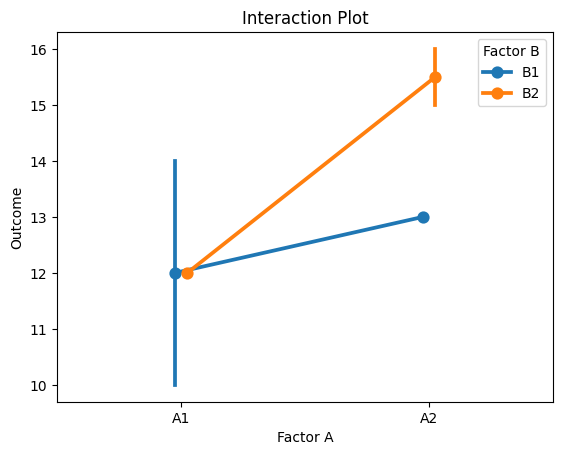

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Factor A': ['A1', 'A1', 'A1', 'A2', 'A2', 'A2'],
    'Factor B': ['B1', 'B2', 'B1', 'B2', 'B1', 'B2'],
    'Outcome': [10, 12, 14, 15, 13, 16]
}

df = pd.DataFrame(data)

# Interaction plot
sns.pointplot(data=df, x='Factor A', y='Outcome', hue='Factor B', markers='o', linestyles='-', dodge=True)
plt.title('Interaction Plot')
plt.xlabel('Factor A')
plt.ylabel('Outcome')
plt.show()


In [ ]:
import scipy.stats as stats
import pandas as pd

# Define the conditions for each group (popularity conditions)
conditions = {
    'popularity == 0 and Popularity_Label == "Always Zero"':
        filtered_artifact[(filtered_artifact['Net_Popularity_Change'] == 0) &
                          (filtered_artifact['Popularity_Label'] == "Always Zero")],

    'popularity == 0 and Popularity_Label == "Constant"':
        filtered_artifact[(filtered_artifact['Net_Popularity_Change'] == 0) &
                          (filtered_artifact['Popularity_Label'] == "Constant")],

    'popularity < 0':
        filtered_artifact[filtered_artifact['Net_Popularity_Change'] < 0],

    'popularity > 0':
        filtered_artifact[filtered_artifact['Net_Popularity_Change'] > 0],
}

# Define the metrics to compare
metrics = ['num_releases', 'Net_Total_Contribution_Change', 'avg_time_gap', 'releases_per_day']

# Perform pairwise comparisons for each metric
test_results = []

# Create all possible pairs of conditions
condition_pairs = [(cond1, cond2) for cond1 in conditions for cond2 in conditions if cond1 != cond2]

# Function to determine star rating based on p-value
def significance_stars(p_value):
    if p_value < 0.001:
        return '***'  # Very significant
    elif p_value < 0.01:
        return '**'   # Significant
    elif p_value < 0.05:
        return '*'    # Marginally significant
    else:
        return 'ns'   # Not significant

# Perform the tests for each combination
for cond1_name, cond1_data in conditions.items():
    for cond2_name, cond2_data in conditions.items():
        if cond1_name != cond2_name:  # Only compare different conditions
            for metric in metrics:
                # Check if the data is normally distributed using Shapiro-Wilk test
                _, p_value_cond1 = stats.shapiro(cond1_data[metric])
                _, p_value_cond2 = stats.shapiro(cond2_data[metric])

                # Perform t-test or Mann-Whitney U test based on normality
                if p_value_cond1 > 0.05 and p_value_cond2 > 0.05:
                    # Perform t-test (independent two-sample t-test)
                    stat, p_val = stats.ttest_ind(cond1_data[metric], cond2_data[metric])
                    test_type = 't-test'
                else:
                    # Perform Mann-Whitney U test (non-parametric)
                    stat, p_val = stats.mannwhitneyu(cond1_data[metric], cond2_data[metric])
                    test_type = 'Mann-Whitney U test'

                # Convert p-value to star rating
                significance = significance_stars(p_val)

                # Store the results
                test_results.append({
                    'Metric': metric,
                    'Condition 1': cond1_name,
                    'Condition 2': cond2_name,
                    'Test': test_type,
                    'Statistic': stat,
                    'P-Value': p_val,
                    'Significance': significance
                })

# Convert results into DataFrame for better visualization
test_results_df = pd.DataFrame(test_results)

# Print the results
test_results_df


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 389092.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22082.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 79440.
  res = hypotest_fun_out(*samples, **kwds)


,Metric,Condition 1,Condition 2,Test,Statistic,P-Value,Significance
0,num_releases,"popularity == 0 and Popularity_Label == ""Alway...","popularity == 0 and Popularity_Label == ""Const...",Mann-Whitney U test,3.770007e+09,5.449059e-208,***
1,Net_Total_Contribution_Change,"popularity == 0 and Popularity_Label == ""Alway...","popularity == 0 and Popularity_Label == ""Const...",Mann-Whitney U test,4.311141e+09,6.710389e-63,***
2,avg_time_gap,"popularity == 0 and Popularity_Label == ""Alway...","popularity == 0 and Popularity_Label == ""Const...",Mann-Whitney U test,5.041946e+09,0.000000e+00,***
3,releases_per_day,"popularity == 0 and Popularity_Label == ""Alway...","popularity == 0 and Popularity_Label == ""Const...",Mann-Whitney U test,3.555557e+09,0.000000e+00,***
4,num_releases,"popularity == 0 and Popularity_Label == ""Alway...",popularity < 0,Mann-Whitney U test,7.417474e+08,1.424267e-85,***
5,Net_Total_Contribution_Change,"popularity == 0 and Popularity_Label == ""Alway...",popularity < 0,Mann-Whitney U test,6.182374e+08,6.547636e-02,ns
6,avg_time_gap,"popularity == 0 and Popularity_Label == ""Alway...",popularity < 0,Mann-Whitney U test,6.618487e+08,3.654588e-12,***
7,releases_per_day,"popularity == 0 and Popularity_Label == ""Alway...",popularity < 0,Mann-Whitney U test,5.564062e+08,5.275176e-22,***
8,num_releases,"popularity == 0 and Popularity_Label == ""Alway...",popularity > 0,Mann-Whitney U test,8.500275e+09,0.000000e+00,***
9,Net_Total_Contribution_Change,"popularity == 0 and Popularity_Label == ""Alway...",popularity > 0,Mann-Whitney U test,1.556467e+10,0.000000e+00,***


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Fill NaN and inf values with zero in the artifact_summary dataset
artifact_summary['avg_time_gap'] = artifact_summary['avg_time_gap'].fillna(0).replace([float('inf'), -float('inf')], 0)
artifact_summary['releases_per_day'] = artifact_summary['releases_per_day'].fillna(0).replace([float('inf'), -float('inf')], 0)
artifact_summary['releases_per_year'] = artifact_summary['releases_per_year'].fillna(0).replace([float('inf'), -float('inf')], 0)

# Filter out entries with only one release
filtered_artifact = artifact_summary[artifact_summary['num_releases'] > 1]

# Define conditions for net_change_gradient_sum
gradient_conditions = {
    'gradient == 0 and Total_Contribution_Label == "Always Zero"':
        (filtered_artifact['Net_Total_Contribution_Change'] == 0) & (filtered_artifact['Total_Contribution_Label'] == "Always Zero"),

    'gradient == 0 and Total_Contribution_Label == "Constant"':
        (filtered_artifact['Net_Total_Contribution_Change'] == 0) & (filtered_artifact['Total_Contribution_Label'] == "Constant"),

    'gradient < 0': filtered_artifact['Net_Total_Contribution_Change'] < 0,
    'gradient > 0': filtered_artifact['Net_Total_Contribution_Change'] > 0
}

# Function to calculate confidence interval
def calculate_confidence_interval(data):
    mean = data.mean()
    std_dev = data.std()
    n = len(data)
    confidence_level = 0.95
    ci = stats.t.interval(confidence_level, n-1, loc=mean, scale=std_dev/np.sqrt(n))
    return (mean, std_dev, ci[0], ci[1])  # mean, std deviation, lower CI, upper CI

# Prepare results for total contribution-related conditions
contribution_results = []

for grad_key, grad_condition in gradient_conditions.items():
    # Filter data based on gradient conditions
    condition_data = filtered_artifact[grad_condition]

    # Calculate mean, standard deviation, and confidence interval for each metric
    num_releases_stats = calculate_confidence_interval(condition_data['num_releases'])
    net_change_popularity_sum_stats = calculate_confidence_interval(condition_data['Net_Popularity_Change'])
    avg_time_gap_stats = calculate_confidence_interval(condition_data['avg_time_gap'])
    releases_per_day_stats = calculate_confidence_interval(condition_data['releases_per_day'])
    releases_per_year_stats = calculate_confidence_interval(condition_data['releases_per_year'])

    metrics = {
        "Condition Combination (Total Contribution)": grad_key,
        "Count": condition_data.shape[0],
        "num_releases (mean ± std, CI)": f"{num_releases_stats[0]:.2f} ± {num_releases_stats[1]:.2f} ({num_releases_stats[2]:.2f}, {num_releases_stats[3]:.2f})",
        "net_change_Popularity_sum (mean ± std, CI)": f"{net_change_popularity_sum_stats[0]:.2f} ± {net_change_popularity_sum_stats[1]:.2f} ({net_change_popularity_sum_stats[2]:.2f}, {net_change_popularity_sum_stats[3]:.2f})",
        "avg_time_gap (mean ± std, CI)": f"{avg_time_gap_stats[0]:.2f} ± {avg_time_gap_stats[1]:.2f} ({avg_time_gap_stats[2]:.2f}, {avg_time_gap_stats[3]:.2f})",
        "releases_per_day (mean ± std, CI)": f"{releases_per_day_stats[0]:.2f} ± {releases_per_day_stats[1]:.2f} ({releases_per_day_stats[2]:.2f}, {releases_per_day_stats[3]:.2f})",
        "releases_per_year (mean ± std, CI)": f"{releases_per_year_stats[0]:.2f} ± {releases_per_year_stats[1]:.2f} ({releases_per_year_stats[2]:.2f}, {releases_per_year_stats[3]:.2f})",
    }

    contribution_results.append(metrics)

# Convert contribution results to a DataFrame for better visualization
contribution_results_df = pd.DataFrame(contribution_results)

# Print the results
contribution_results_df


,Condition Combination (Total Contribution),Count,"num_releases (mean ± std, CI)","net_change_Popularity_sum (mean ± std, CI)","avg_time_gap (mean ± std, CI)","releases_per_day (mean ± std, CI)","releases_per_year (mean ± std, CI)"
0,gradient == 0 and Total_Contribution_Label == ...,492412,"28.82 ± 94.60 (28.56, 29.09)","3.94 ± 275.81 (3.17, 4.72)","90.95 ± 175.50 (90.46, 91.44)","232.23 ± 9400.71 (205.97, 258.48)","84762.44 ± 3431258.26 (75178.63, 94346.25)"
1,gradient == 0 and Total_Contribution_Label == ...,356,"72.96 ± 131.59 (59.24, 86.68)","497.28 ± 6907.72 (-222.74, 1217.29)","93.08 ± 128.49 (79.69, 106.48)","1581.53 ± 15896.10 (-75.37, 3238.44)","577259.77 ± 5802074.72 (-27509.29, 1182028.84)"
2,gradient < 0,1001,"98.52 ± 159.71 (88.61, 108.42)","132.37 ± 970.30 (72.19, 192.55)","103.89 ± 210.96 (90.80, 116.97)","0.04 ± 0.07 (0.03, 0.04)","13.17 ± 24.60 (11.64, 14.69)"
3,gradient > 0,20,"58.95 ± 104.50 (10.04, 107.86)","329.50 ± 1277.36 (-268.32, 927.32)","90.44 ± 104.22 (41.66, 139.22)","17280.03 ± 77278.50 (-18887.42, 53447.49)","6307212.12 ± 28206653.04 (-6893907.86, 1950833..."


In [ ]:
import scipy.stats as stats
import pandas as pd

# Fill NaN and inf values with zero in the artifact_summary dataset
artifact_summary['avg_time_gap'] = artifact_summary['avg_time_gap'].fillna(0).replace([float('inf'), -float('inf')], 0)
artifact_summary['releases_per_day'] = artifact_summary['releases_per_day'].fillna(0).replace([float('inf'), -float('inf')], 0)
artifact_summary['releases_per_year'] = artifact_summary['releases_per_year'].fillna(0).replace([float('inf'), -float('inf')], 0)

# Filter out entries with only one release
filtered_artifact = artifact_summary[artifact_summary['num_releases'] > 1]

# Define conditions for net_change_gradient_sum
gradient_conditions = {
    'gradient == 0 and Total_Contribution_Label == "Always Zero"':
        (filtered_artifact['Net_Total_Contribution_Change'] == 0) &
        (filtered_artifact['Total_Contribution_Label'] == "Always Zero"),

    'gradient == 0 and Total_Contribution_Label == "Constant"':
        (filtered_artifact['Net_Total_Contribution_Change'] == 0) &
        (filtered_artifact['Total_Contribution_Label'] == "Constant"),

    'gradient < 0': filtered_artifact['Net_Total_Contribution_Change'] < 0,
    'gradient > 0': filtered_artifact['Net_Total_Contribution_Change'] > 0
}

# Function to determine star rating based on p-value
def significance_stars(p_value):
    if p_value < 0.001:
        return '***'  # Very significant
    elif p_value < 0.01:
        return '**'   # Significant
    elif p_value < 0.05:
        return '*'    # Marginally significant
    else:
        return 'ns'   # Not significant

# Prepare results for contribution-related conditions
contribution_results = []

# Create all possible pairs of conditions
condition_pairs = [(cond1_name, cond1) for cond1_name, cond1 in gradient_conditions.items()]
for cond1_name, cond1_condition in gradient_conditions.items():
    for cond2_name, cond2_condition in gradient_conditions.items():
        if cond1_name != cond2_name:  # Only compare different conditions
            # Filter data based on conditions
            cond1_data = filtered_artifact[cond1_condition]
            cond2_data = filtered_artifact[cond2_condition]

            # Compare each metric between the two conditions
            for metric in ['num_releases', 'Net_Popularity_Change', 'avg_time_gap', 'releases_per_day']:
                # Check if the data is normally distributed using Shapiro-Wilk test
                _, p_value_cond1 = stats.shapiro(cond1_data[metric])
                _, p_value_cond2 = stats.shapiro(cond2_data[metric])

                # Perform t-test or Mann-Whitney U test based on normality
                if p_value_cond1 > 0.05 and p_value_cond2 > 0.05:
                    # Perform t-test (independent two-sample t-test)
                    stat, p_val = stats.ttest_ind(cond1_data[metric], cond2_data[metric])
                    test_type = 't-test'
                else:
                    # Perform Mann-Whitney U test (non-parametric)
                    stat, p_val = stats.mannwhitneyu(cond1_data[metric], cond2_data[metric])
                    test_type = 'Mann-Whitney U test'

                # Convert p-value to star rating
                significance = significance_stars(p_val)

                # Store the results
                contribution_results.append({
                    'Metric': metric,
                    'Condition 1': cond1_name,
                    'Condition 2': cond2_name,
                    'Test': test_type,
                    'Statistic': stat,
                    'P-Value': p_val,
                    'Significance': significance
                })

# Convert results into DataFrame for better visualization
contribution_results_df = pd.DataFrame(contribution_results)

# Print the results
contribution_results_df


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 492412.
  res = hypotest_fun_out(*samples, **kwds)


,Metric,Condition 1,Condition 2,Test,Statistic,P-Value,Significance
0,num_releases,gradient == 0 and Total_Contribution_Label == ...,gradient == 0 and Total_Contribution_Label == ...,Mann-Whitney U test,51075372.0,1.534028e-42,***
1,Net_Popularity_Change,gradient == 0 and Total_Contribution_Label == ...,gradient == 0 and Total_Contribution_Label == ...,Mann-Whitney U test,59433417.5,3.688555e-59,***
2,avg_time_gap,gradient == 0 and Total_Contribution_Label == ...,gradient == 0 and Total_Contribution_Label == ...,Mann-Whitney U test,74669889.0,1.313733e-06,***
3,releases_per_day,gradient == 0 and Total_Contribution_Label == ...,gradient == 0 and Total_Contribution_Label == ...,Mann-Whitney U test,104231316.0,6.394278e-10,***
4,num_releases,gradient == 0 and Total_Contribution_Label == ...,gradient < 0,Mann-Whitney U test,88705697.0,1.784106e-270,***
5,Net_Popularity_Change,gradient == 0 and Total_Contribution_Label == ...,gradient < 0,Mann-Whitney U test,119875840.0,0.000000e+00,***
6,avg_time_gap,gradient == 0 and Total_Contribution_Label == ...,gradient < 0,Mann-Whitney U test,207037866.5,2.040439e-18,***
7,releases_per_day,gradient == 0 and Total_Contribution_Label == ...,gradient < 0,Mann-Whitney U test,301808010.5,9.507679e-35,***
8,num_releases,gradient == 0 and Total_Contribution_Label == ...,gradient > 0,Mann-Whitney U test,3758531.0,6.596535e-02,ns
9,Net_Popularity_Change,gradient == 0 and Total_Contribution_Label == ...,gradient > 0,Mann-Whitney U test,4295612.5,1.271192e-01,ns
